In [3]:
import pandas as pd

# Path to your CSV file
file_path = "/media/data-ssd/PINN/DATA/model data after proccessing/full POC model/3 final files according to spatial PINN Hebrew/merged/nov2apr/event_base_dfs/remapping time dfs/Merged_North_Dead_Sea_2012_remapped.csv"

# Read the CSV
df_2012 = pd.read_csv(file_path)

# Print shape (rows, columns)
print("Shape:", df_2012.shape)

# Print first 5 rows
print("Head:")
print(df_2012.head())


Shape: (1108800, 7)
Head:
   latitude  longitude  rainrate  elevation  slope_calculated  rg_qms  tau
0   31.7542    35.3533     0.000  179.91008               NaN     NaN  0.0
1   31.5472    35.4049     0.000 -424.01000               NaN     NaN  0.0
2   31.5392    35.0988     0.024  964.11554               NaN     NaN  0.0
3   31.5392    35.1094     0.005  942.76620          0.802732     NaN  0.0
4   31.5392    35.1199     0.000  995.55310          1.051210     NaN  0.0


In [4]:
import os
import pandas as pd
import numpy as np

base_path = "/media/data-ssd/PINN/DATA/model data after proccessing/full POC model/3 final files according to spatial PINN Hebrew/merged/nov2apr/event_base_dfs/remapping time dfs"
years = [2012, 2013, 2014, 2015, 2016, 2018, 2019, 2020]

results = {}

for yr in years:
    file_name = f"Merged_North_Dead_Sea_{yr}_remapped.csv"
    full_path = os.path.join(base_path, file_name)
    
    if not os.path.exists(full_path):
        print(f"WARNING: File not found: {full_path}")
        continue
    
    df = pd.read_csv(full_path)
    print(f"\n=== Year {yr} ===")
    print(f"Shape: {df.shape}")

    # 1) Tau check
    tau_counts = df.groupby('tau').size()
    unique_tau_count = tau_counts.shape[0]
    mismatch = tau_counts[tau_counts != 1056]
    
    # 2) Missing data
    missing_data = df.isnull().sum()
    
    # 3) Discharge coverage
    discharge_df = df[~df['rg_qms'].isnull()]
    discharge_stations = discharge_df[['latitude','longitude']].drop_duplicates()
    
    # 4) Store results
    results[yr] = {
        'shape': df.shape,
        'unique_tau': unique_tau_count,
        'tau_mismatch': mismatch,
        'missing_data': missing_data,
        'num_discharge_points': discharge_df.shape[0],
        'discharge_stations': discharge_stations
    }
    
    # Quick prints
    print("Unique tau values:", unique_tau_count)
    if not mismatch.empty:
        print("Some tau do NOT have 1056 pixels:\n", mismatch)
    print("Missing data:\n", missing_data)
    print("Discharge station lat-lons:\n", discharge_stations)



=== Year 2012 ===
Shape: (1108800, 7)
Unique tau values: 1050
Missing data:
 latitude                  0
longitude                 0
rainrate                  0
elevation                 0
slope_calculated     113400
rg_qms              1105650
tau                       0
dtype: int64
Discharge station lat-lons:
      latitude  longitude
140   31.5834    35.3523
364   31.4573    35.3937
875   31.6013    35.3630

=== Year 2013 ===
Shape: (1785696, 7)
Unique tau values: 1691
Missing data:
 latitude                  0
longitude                 0
rainrate                  0
elevation                 0
slope_calculated     182628
rg_qms              1780623
tau                       0
dtype: int64
Discharge station lat-lons:
      latitude  longitude
140   31.5834    35.3523
364   31.4573    35.3937
875   31.6013    35.3630

=== Year 2014 ===
Shape: (1673760, 7)
Unique tau values: 1585
Missing data:
 latitude                  0
longitude                 0
rainrate                  0
elevat

Selected tau=0.0
Number of rows for this tau: 1056
Head of df_one_tau:
    latitude  longitude  rainrate  elevation  slope_calculated  rg_qms  tau
0   31.7542    35.3533     0.000  179.91008               NaN     NaN  0.0
1   31.5472    35.4049     0.000 -424.01000               NaN     NaN  0.0
2   31.5392    35.0988     0.024  964.11554               NaN     NaN  0.0
3   31.5392    35.1094     0.005  942.76620          0.802732     NaN  0.0
4   31.5392    35.1199     0.000  995.55310          1.051210     NaN  0.0


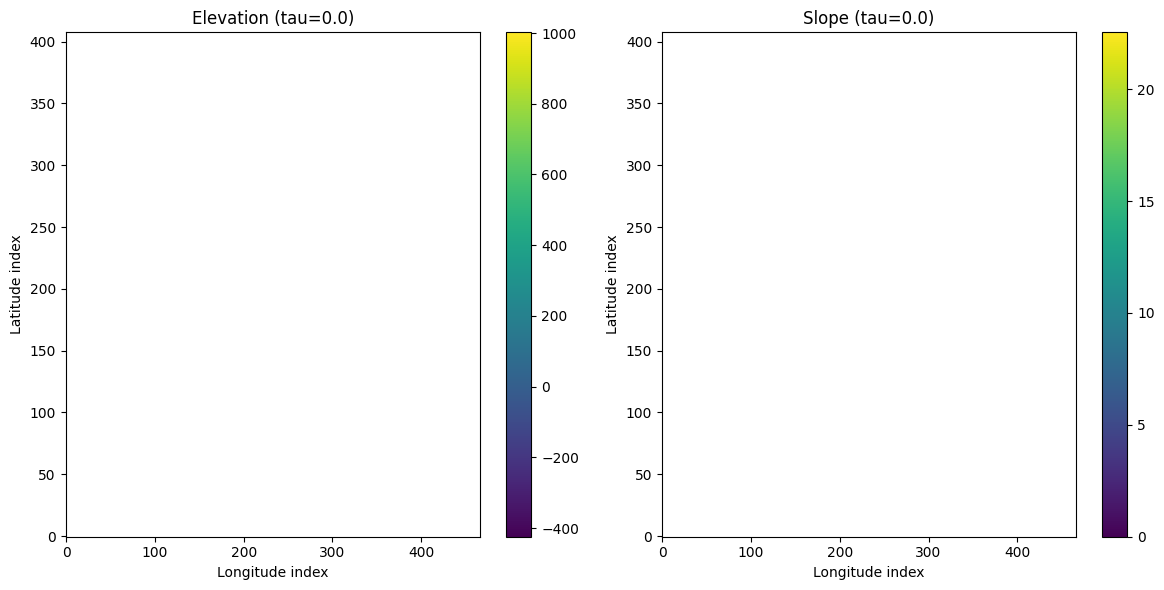

In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. LOAD THE CSV
file_path = "/media/data-ssd/PINN/DATA/model data after proccessing/full POC model/3 final files according to spatial PINN Hebrew/merged/nov2apr/event_base_dfs/remapping time dfs/Merged_North_Dead_Sea_2012_remapped.csv"
df_2012 = pd.read_csv(file_path)

# 2. SELECT A SINGLE TIME STEP
tau_val = 0.0  # choose any tau in the dataset
df_one_tau = df_2012[df_2012['tau'] == tau_val].copy()

print(f"Selected tau={tau_val}")
print("Number of rows for this tau:", df_one_tau.shape[0])
print("Head of df_one_tau:\n", df_one_tau.head())

# 3. PIVOT TO CREATE 2D GRIDS
# If your lat-lon grid is strictly structured, pivot should give a matrix
# (latitude as rows, longitude as columns).

elevation_grid = df_one_tau.pivot(index='latitude',
                                  columns='longitude',
                                  values='elevation')

slope_grid = df_one_tau.pivot(index='latitude',
                              columns='longitude',
                              values='slope_calculated')

# 4. SORT THE INDEX AND COLUMNS IF NEEDED
# (for nicer visualization with latitude ascending from bottom to top)
elevation_grid = elevation_grid.sort_index(ascending=True)
elevation_grid = elevation_grid[np.sort(elevation_grid.columns)]

slope_grid = slope_grid.sort_index(ascending=True)
slope_grid = slope_grid[np.sort(slope_grid.columns)]

# 5. VISUALIZE SIDE-BY-SIDE
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Elevation
im1 = axes[0].imshow(elevation_grid, origin='lower', aspect='auto')
axes[0].set_title(f"Elevation (tau={tau_val})")
axes[0].set_xlabel("Longitude index")
axes[0].set_ylabel("Latitude index")
fig.colorbar(im1, ax=axes[0])

# Slope
im2 = axes[1].imshow(slope_grid, origin='lower', aspect='auto')
axes[1].set_title(f"Slope (tau={tau_val})")
axes[1].set_xlabel("Longitude index")
axes[1].set_ylabel("Latitude index")
fig.colorbar(im2, ax=axes[1])

plt.tight_layout()
plt.show()


In [7]:
import pandas as pd
import numpy as np

file_path = "Merged_North_Dead_Sea_2012_remapped.csv"
df_2012 = pd.read_csv(file_path)

print("Top tau counts:")
print(df_2012['tau'].value_counts().head())

# Choose a tau that definitely has many rows
some_tau = 10.0  
df_one_tau = df_2012[df_2012['tau'] == some_tau].copy()
print(f"Rows for tau={some_tau}: {df_one_tau.shape[0]}")

# Round lat/lon if needed
df_one_tau['latitude'] = df_one_tau['latitude'].round(4)
df_one_tau['longitude'] = df_one_tau['longitude'].round(4)

dupe_mask = df_one_tau.duplicated(subset=['latitude','longitude'], keep=False)
print("Number of duplicates for this tau:", dupe_mask.sum())

# Pivot with an aggregator
slope_grid = df_one_tau.pivot_table(
    index='latitude', 
    columns='longitude', 
    values='slope_calculated',
    aggfunc='mean'
)

print("Slope grid shape:", slope_grid.shape)
print("Slope grid NaN count:", slope_grid.isna().sum().sum())

# If slope_grid is mostly valid, you can plot now:
# ...


Top tau counts:
tau
0.000000    1056
0.656816    1056
0.658723    1056
0.659676    1056
0.660629    1056
Name: count, dtype: int64
Rows for tau=10.0: 0
Number of duplicates for this tau: 0
Slope grid shape: (0, 0)
Slope grid NaN count: 0.0


Rows for tau=0.0: 1056
Elevation grid shape: (408, 467)
Slope grid shape: (408, 467)
NaNs in elevation_grid: 189480
NaNs in slope_grid: 189588


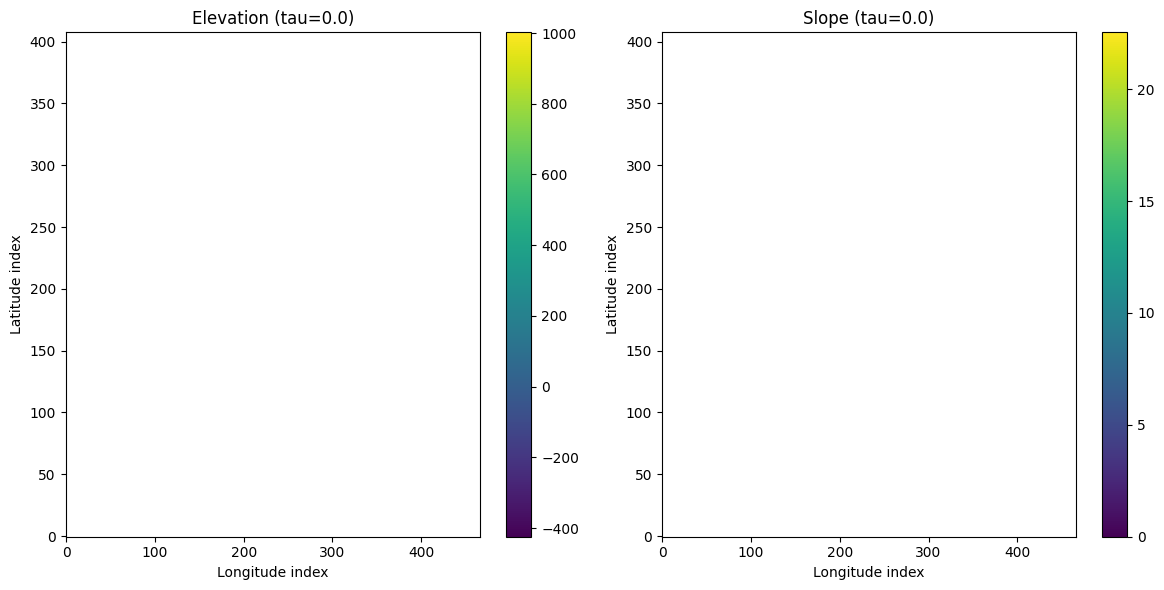

In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. LOAD DATA (example for 2012)
file_path = "/media/data-ssd/PINN/DATA/model data after proccessing/full POC model/3 final files according to spatial PINN Hebrew/merged/nov2apr/event_base_dfs/remapping time dfs/Merged_North_Dead_Sea_2012_remapped.csv"
df_2012 = pd.read_csv(file_path)

# 2. PICK A TIME STEP THAT EXISTS
tau_val = 0.0  # or pick from df_2012['tau'].value_counts() if you see different values
df_one_tau = df_2012[df_2012['tau'] == tau_val].copy()
print(f"Rows for tau={tau_val}: {df_one_tau.shape[0]}")

# OPTIONAL: If you see weird floating lat/lon issues, you can round
df_one_tau['latitude'] = df_one_tau['latitude'].round(4)
df_one_tau['longitude'] = df_one_tau['longitude'].round(4)

# 3. PIVOT TO 2D GRIDS (lat x lon)
elevation_grid = df_one_tau.pivot(
    index='latitude', 
    columns='longitude', 
    values='elevation'
)
slope_grid = df_one_tau.pivot(
    index='latitude', 
    columns='longitude', 
    values='slope_calculated'
)

# For a "north-up" map in imshow, sort lat ascending
elevation_grid = elevation_grid.sort_index(ascending=True)
elevation_grid = elevation_grid[np.sort(elevation_grid.columns)]

slope_grid = slope_grid.sort_index(ascending=True)
slope_grid = slope_grid[np.sort(slope_grid.columns)]

print("Elevation grid shape:", elevation_grid.shape)
print("Slope grid shape:", slope_grid.shape)

print("NaNs in elevation_grid:", elevation_grid.isna().sum().sum())
print("NaNs in slope_grid:", slope_grid.isna().sum().sum())

# 4. SIDE-BY-SIDE PLOT
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Elevation
im1 = axes[0].imshow(elevation_grid, origin='lower', aspect='auto')
axes[0].set_title(f"Elevation (tau={tau_val})")
axes[0].set_xlabel("Longitude index")
axes[0].set_ylabel("Latitude index")
fig.colorbar(im1, ax=axes[0])

# Slope
im2 = axes[1].imshow(slope_grid, origin='lower', aspect='auto')
axes[1].set_title(f"Slope (tau={tau_val})")
axes[1].set_xlabel("Longitude index")
axes[1].set_ylabel("Latitude index")
fig.colorbar(im2, ax=axes[1])

plt.tight_layout()
plt.show()


In [10]:
import pandas as pd

# Exact path you mentioned
file_path = "/media/data-ssd/PINN/DATA/model data after proccessing/full POC model/3 final files according to spatial PINN Hebrew/merged/nov2apr/event_base_dfs/remapping time dfs/Merged_North_Dead_Sea_2012_remapped.csv"

df = pd.read_csv(file_path)

# Print the shape (rows, columns)
print("DataFrame shape:", df.shape)

# Print 1060 rows without truncation
with pd.option_context('display.max_rows', 1060):
    print(df.head(1060))


DataFrame shape: (1108800, 7)
      latitude  longitude  rainrate    elevation  slope_calculated  rg_qms  \
0      31.7542    35.3533     0.000   179.910080               NaN     NaN   
1      31.5472    35.4049     0.000  -424.010000               NaN     NaN   
2      31.5392    35.0988     0.024   964.115540               NaN     NaN   
3      31.5392    35.1094     0.005   942.766200      8.027316e-01     NaN   
4      31.5392    35.1199     0.000   995.553100      1.051210e+00     NaN   
5      31.5392    35.1305     0.000   932.419430      3.374462e+00     NaN   
6      31.5391    35.1410     0.000   856.123700      1.835453e+00     NaN   
7      31.5391    35.1516     0.000   879.945900      1.602898e+00     NaN   
8      31.5391    35.1621     0.000   902.819900      4.105649e+00     NaN   
9      31.5390    35.1727     0.000   787.432500      5.046819e+00     NaN   
10     31.5390    35.1832     0.000   721.821530      5.735728e+00     NaN   
11     31.5390    35.1938     0.00

Data shape: (1108800, 7)
Columns: Index(['latitude', 'longitude', 'rainrate', 'elevation', 'slope_calculated',
       'rg_qms', 'tau'],
      dtype='object')
Chosen tau_1: 0.0
Chosen tau_2: 0.0009532888465204
Rows for tau_1=0.0: 1056
Rows for tau_2=0.0009532888465204: 1056


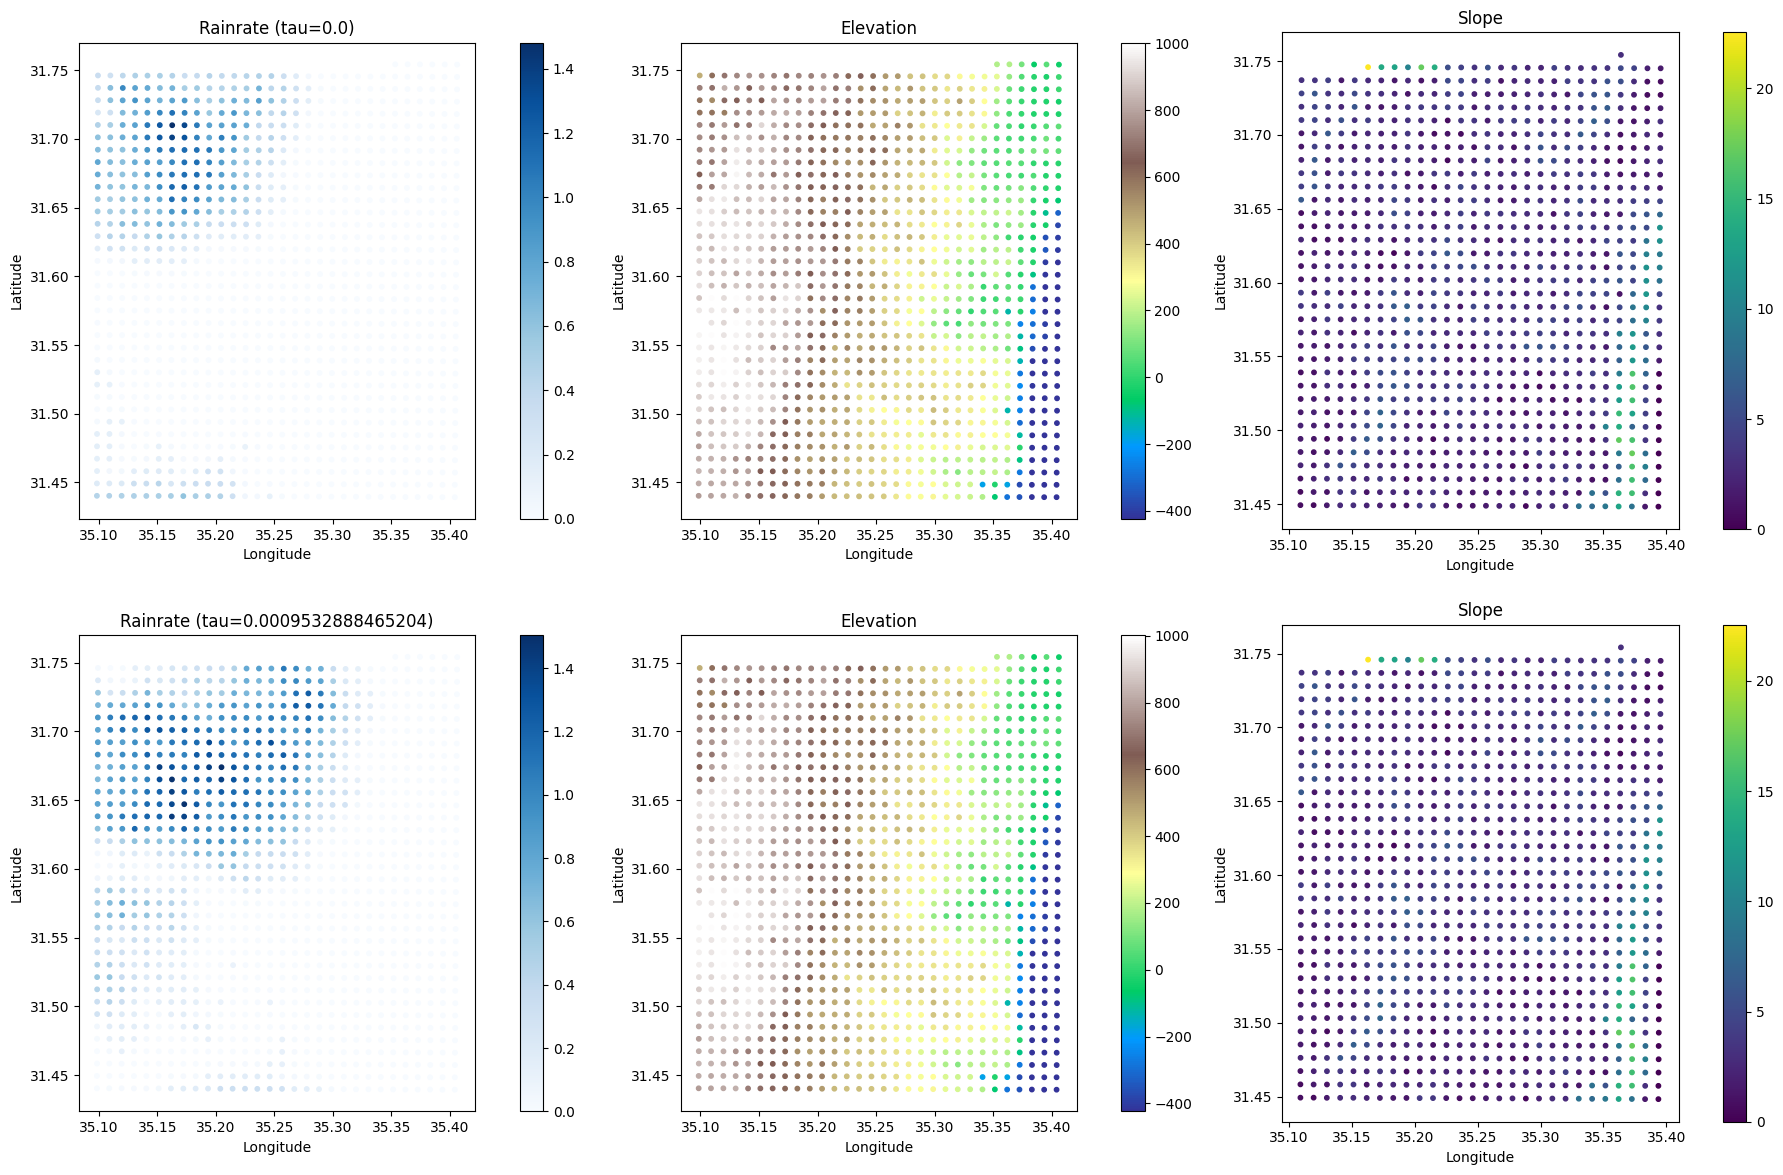

In [12]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# ---------------------------------------------------------------------
# 1) Load the data
# ---------------------------------------------------------------------
file_path = "/media/data-ssd/PINN/DATA/model data after proccessing/full POC model/3 final files according to spatial PINN Hebrew/merged/nov2apr/event_base_dfs/remapping time dfs/Merged_North_Dead_Sea_2012_remapped.csv"
df = pd.read_csv(file_path)

# Convert columns to appropriate types, if needed
# (Not strictly necessary unless you have non-float lat/lon)
df['latitude'] = df['latitude'].astype(float)
df['longitude'] = df['longitude'].astype(float)

print("Data shape:", df.shape)
print("Columns:", df.columns)

# ---------------------------------------------------------------------
# 2) Pick two tau values
# ---------------------------------------------------------------------
# Let’s say we pick the first tau we see (often 0.0)
# and the next unique tau as a second example

unique_tau = sorted(df['tau'].unique())
if len(unique_tau) < 2:
    print("⚠️ Less than 2 unique tau values found! Using the same tau twice.")
    tau_1 = unique_tau[0]
    tau_2 = unique_tau[0]
else:
    tau_1 = unique_tau[0]
    tau_2 = unique_tau[1]

print("Chosen tau_1:", tau_1)
print("Chosen tau_2:", tau_2)

# ---------------------------------------------------------------------
# 3) Filter data for those two tau
# ---------------------------------------------------------------------
df_tau1 = df[df['tau'] == tau_1].copy()
df_tau2 = df[df['tau'] == tau_2].copy()

print(f"Rows for tau_1={tau_1}: {df_tau1.shape[0]}")
print(f"Rows for tau_2={tau_2}: {df_tau2.shape[0]}")

# ---------------------------------------------------------------------
# 4) Convert to GeoDataFrames
# ---------------------------------------------------------------------
gdf_tau1 = gpd.GeoDataFrame(
    df_tau1,
    geometry=gpd.points_from_xy(df_tau1['longitude'], df_tau1['latitude']),
    crs="EPSG:4326"
)

gdf_tau2 = gpd.GeoDataFrame(
    df_tau2,
    geometry=gpd.points_from_xy(df_tau2['longitude'], df_tau2['latitude']),
    crs="EPSG:4326"
)

# ---------------------------------------------------------------------
# 5) Define a helper function to plot each variable with a colorbar
# ---------------------------------------------------------------------
def plot_grid(ax, gdf, column, cmap, title):
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    gdf.plot(
        column=column,
        cmap=cmap,
        legend=True,
        ax=ax,
        cax=cax,
        markersize=10
    )
    ax.set_title(title)
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")

# ---------------------------------------------------------------------
# 6) Create subplots: 2 rows, 3 columns
# ---------------------------------------------------------------------
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

# --- Row 1: tau_1 ---
plot_grid(
    axes[0, 0],
    gdf_tau1,
    column='rainrate',
    cmap='Blues',
    title=f"Rainrate (tau={tau_1})"
)

plot_grid(
    axes[0, 1],
    gdf_tau1,
    column='elevation',
    cmap='terrain',
    title="Elevation"
)

plot_grid(
    axes[0, 2],
    gdf_tau1,
    column='slope_calculated',
    cmap='viridis',
    title="Slope"
)

# --- Row 2: tau_2 ---
plot_grid(
    axes[1, 0],
    gdf_tau2,
    column='rainrate',
    cmap='Blues',
    title=f"Rainrate (tau={tau_2})"
)

plot_grid(
    axes[1, 1],
    gdf_tau2,
    column='elevation',
    cmap='terrain',
    title="Elevation"
)

plot_grid(
    axes[1, 2],
    gdf_tau2,
    column='slope_calculated',
    cmap='viridis',
    title="Slope"
)

plt.tight_layout()
plt.show()



=== YEAR 2012 ===
Reading: /media/data-ssd/PINN/DATA/model data after proccessing/full POC model/3 final files according to spatial PINN Hebrew/merged/nov2apr/event_base_dfs/remapping time dfs/Merged_North_Dead_Sea_2012_remapped.csv
Initial shape: (1108800, 7)
Missing slope before fill: 113400
Missing slope after fill: 113400
Saved filled dataset -> /media/data-ssd/PINN/DATA/model data after proccessing/full POC model/3 final files according to spatial PINN Hebrew/merged/nov2apr/event_base_dfs/remapping time dfs/Merged_North_Dead_Sea_2012_remapped_slopeFilled.csv


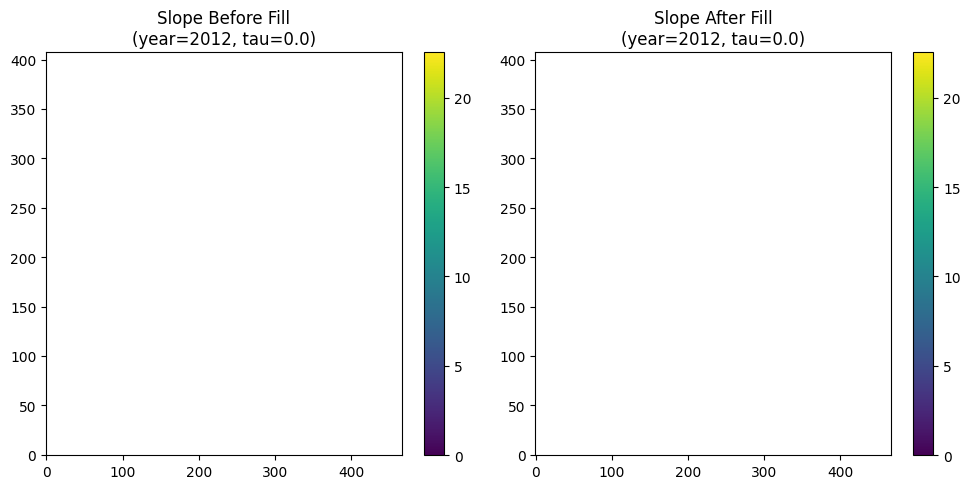


=== YEAR 2013 ===
Reading: /media/data-ssd/PINN/DATA/model data after proccessing/full POC model/3 final files according to spatial PINN Hebrew/merged/nov2apr/event_base_dfs/remapping time dfs/Merged_North_Dead_Sea_2013_remapped.csv
Initial shape: (1785696, 7)
Missing slope before fill: 182628
Missing slope after fill: 182628
Saved filled dataset -> /media/data-ssd/PINN/DATA/model data after proccessing/full POC model/3 final files according to spatial PINN Hebrew/merged/nov2apr/event_base_dfs/remapping time dfs/Merged_North_Dead_Sea_2013_remapped_slopeFilled.csv


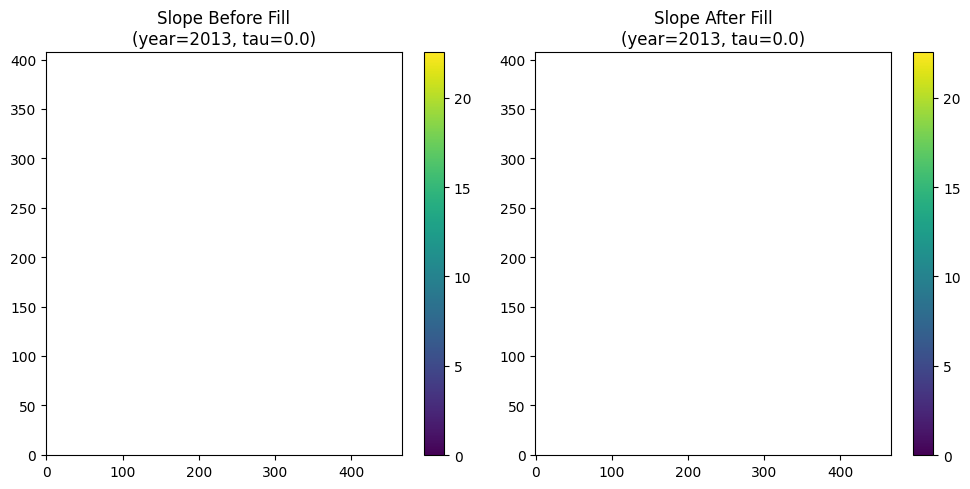


=== YEAR 2014 ===
Reading: /media/data-ssd/PINN/DATA/model data after proccessing/full POC model/3 final files according to spatial PINN Hebrew/merged/nov2apr/event_base_dfs/remapping time dfs/Merged_North_Dead_Sea_2014_remapped.csv
Initial shape: (1673760, 7)
Missing slope before fill: 171180
Missing slope after fill: 171180
Saved filled dataset -> /media/data-ssd/PINN/DATA/model data after proccessing/full POC model/3 final files according to spatial PINN Hebrew/merged/nov2apr/event_base_dfs/remapping time dfs/Merged_North_Dead_Sea_2014_remapped_slopeFilled.csv


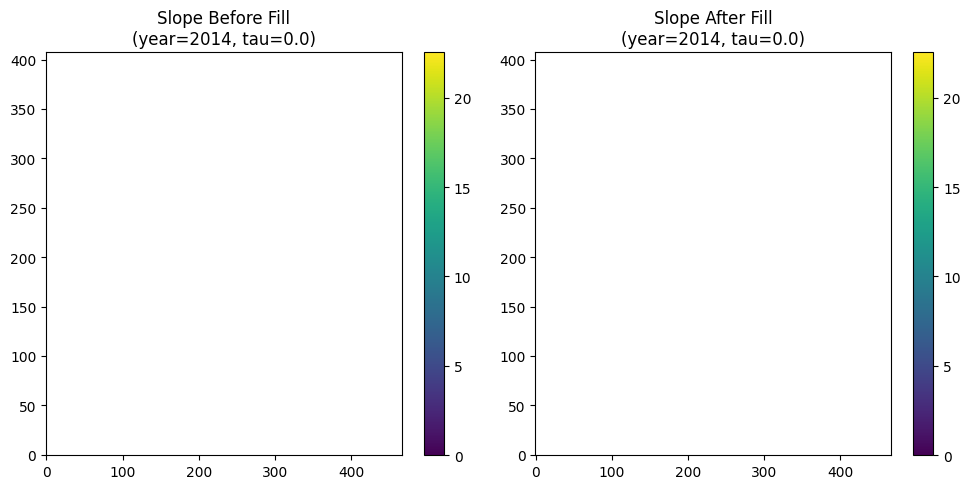


=== YEAR 2015 ===
Reading: /media/data-ssd/PINN/DATA/model data after proccessing/full POC model/3 final files according to spatial PINN Hebrew/merged/nov2apr/event_base_dfs/remapping time dfs/Merged_North_Dead_Sea_2015_remapped.csv
Initial shape: (1709664, 7)
Missing slope before fill: 174852


KeyboardInterrupt: 

In [16]:
%%time
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##############################
# 1) Define Fill Functions
##############################
def fill_slope_2d_nearest(df_slice):
    """
    Fills missing slope_calculated in a single time step using a
    2D nearest-neighbor approach (pivot -> interpolate -> unpivot).
    """
    # Pivot to 2D: lat as rows, lon as columns
    slope_grid = df_slice.pivot(
        index='latitude', 
        columns='longitude', 
        values='slope_calculated'
    )

    # Sort lat/lon for a consistent grid
    slope_grid = slope_grid.sort_index(ascending=True)
    slope_grid = slope_grid[np.sort(slope_grid.columns)]

    # Fill missing using 'nearest' row-wise, then column-wise
    slope_filled = slope_grid.interpolate(method='nearest', axis=0).interpolate(method='nearest', axis=1)

    # Unpivot back to long format
    slope_filled_long = slope_filled.stack().reset_index()
    slope_filled_long.columns = ['latitude','longitude','slope_calculated']

    # Merge back other columns
    df_slice_dropped = df_slice.drop(columns=['slope_calculated'])
    df_filled = pd.merge(
        df_slice_dropped, 
        slope_filled_long, 
        on=['latitude','longitude'],
        how='left'
    )
    return df_filled


def fill_slope_for_all_tau(df):
    """
    For the entire DataFrame (with multiple tau), group by each tau
    and fill slope with fill_slope_2d_nearest. Returns a filled DataFrame.
    """
    filled_list = []
    all_taus = sorted(df['tau'].unique())
    for t in all_taus:
        df_slice = df[df['tau'] == t].copy()
        df_filled_slice = fill_slope_2d_nearest(df_slice)
        filled_list.append(df_filled_slice)
    df_filled = pd.concat(filled_list, ignore_index=True)
    return df_filled


##############################
# 2) Process and Visualize for Each Year
##############################

base_path = "/media/data-ssd/PINN/DATA/model data after proccessing/full POC model/3 final files according to spatial PINN Hebrew/merged/nov2apr/event_base_dfs/remapping time dfs"
years = [2012, 2013, 2014, 2015, 2016, 2018, 2019, 2020]

for yr in years:
    file_name = f"Merged_North_Dead_Sea_{yr}_remapped.csv"
    csv_path = os.path.join(base_path, file_name)

    if not os.path.exists(csv_path):
        print(f"⚠️ File not found: {csv_path}")
        continue

    print(f"\n=== YEAR {yr} ===")
    print(f"Reading: {csv_path}")
    df = pd.read_csv(csv_path)
    print("Initial shape:", df.shape)

    # Count NaNs in slope before
    slope_nan_before = df['slope_calculated'].isna().sum()
    print(f"Missing slope before fill: {slope_nan_before}")

    # Fill slope
    df_filled = fill_slope_for_all_tau(df)

    # Count NaNs in slope after
    slope_nan_after = df_filled['slope_calculated'].isna().sum()
    print(f"Missing slope after fill: {slope_nan_after}")

    # Save the new CSV
    out_name = f"Merged_North_Dead_Sea_{yr}_remapped_slopeFilled.csv"
    out_path = os.path.join(base_path, out_name)
    df_filled.to_csv(out_path, index=False)
    print(f"Saved filled dataset -> {out_path}")

    ##############################
    # 3) Visualization (BEFORE vs AFTER) for One Time Step
    ##############################
    # We'll pick the FIRST tau in this dataset just for an example
    # (If you want a specific tau, set it explicitly.)
    unique_taus = sorted(df['tau'].unique())
    if len(unique_taus) == 0:
        print("No tau values found, skipping visualization.")
        continue
    
    first_tau = unique_taus[0]
    
    # Slice the original (before fill) and new (after fill) data
    df_slice_before = df[df['tau'] == first_tau].copy()
    df_slice_after = df_filled[df_filled['tau'] == first_tau].copy()

    # Pivot each to a 2D grid for slope
    slope_before = df_slice_before.pivot(
        index='latitude', 
        columns='longitude',
        values='slope_calculated'
    )

    slope_after = df_slice_after.pivot(
        index='latitude', 
        columns='longitude',
        values='slope_calculated'
    )

    # Sort again for consistent orientation
    slope_before = slope_before.sort_index(ascending=True)
    slope_before = slope_before[np.sort(slope_before.columns)]
    slope_after = slope_after.sort_index(ascending=True)
    slope_after = slope_after[np.sort(slope_after.columns)]

    # PLOTTING
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Slope BEFORE
    im1 = axes[0].imshow(slope_before, origin='lower', aspect='auto')
    axes[0].set_title(f"Slope Before Fill\n(year={yr}, tau={first_tau})")
    plt.colorbar(im1, ax=axes[0])

    # Slope AFTER
    im2 = axes[1].imshow(slope_after, origin='lower', aspect='auto')
    axes[1].set_title(f"Slope After Fill\n(year={yr}, tau={first_tau})")
    plt.colorbar(im2, ax=axes[1])

    plt.tight_layout()
    plt.show()


Data shape: (1108800, 7)
Columns: Index(['latitude', 'longitude', 'rainrate', 'elevation', 'rg_qms', 'tau',
       'slope_calculated'],
      dtype='object')
Chosen tau_1: 0.0
Chosen tau_2: 0.0009532888465204
Rows for tau_1=0.0: 1056
Rows for tau_2=0.0009532888465204: 1056


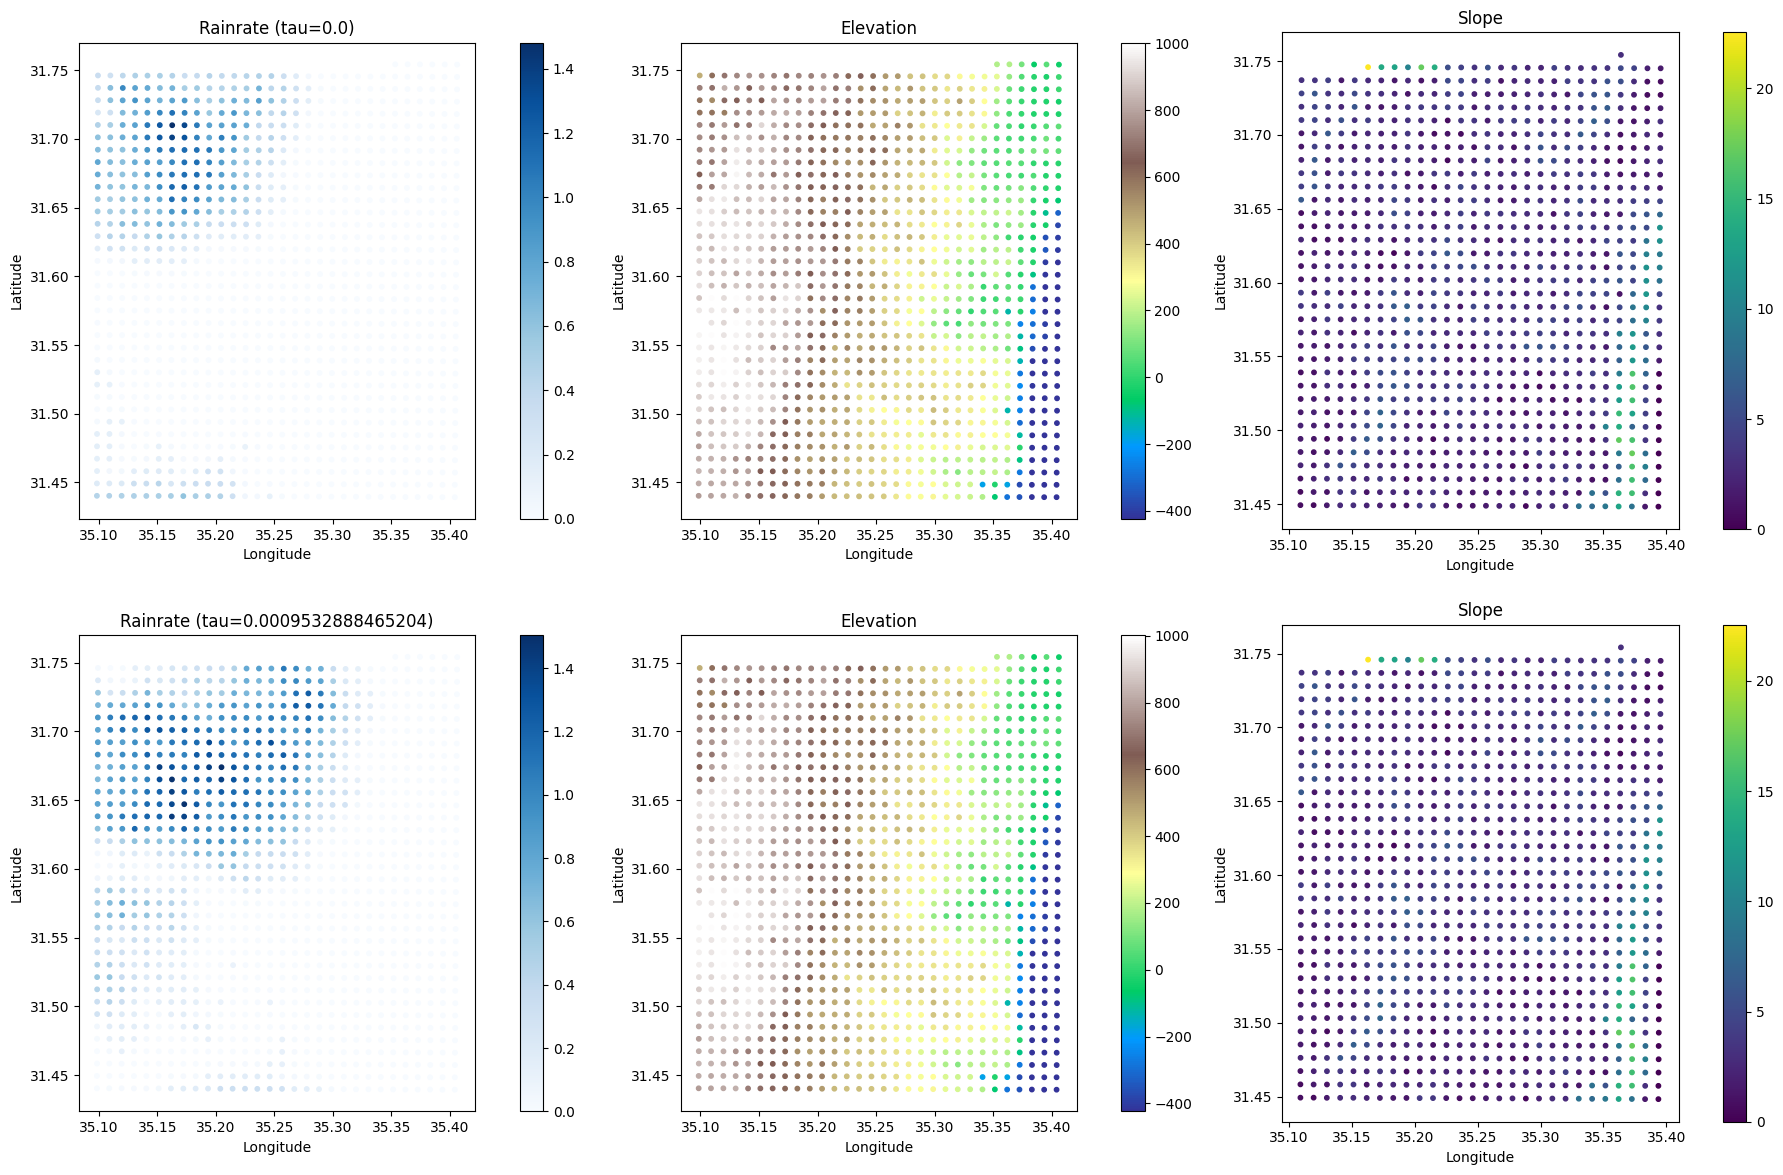

In [17]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# ---------------------------------------------------------------------
# 1) Load the data
# ---------------------------------------------------------------------
file_path = "/media/data-ssd/PINN/DATA/model data after proccessing/full POC model/3 final files according to spatial PINN Hebrew/merged/nov2apr/event_base_dfs/remapping time dfs/Merged_North_Dead_Sea_2012_remapped.csv"
df = pd.read_csv(file_path)

# Convert columns to appropriate types, if needed
# (Not strictly necessary unless you have non-float lat/lon)
df['latitude'] = df['latitude'].astype(float)
df['longitude'] = df['longitude'].astype(float)

print("Data shape:", df.shape)
print("Columns:", df.columns)

# ---------------------------------------------------------------------
# 2) Pick two tau values
# ---------------------------------------------------------------------
# Let’s say we pick the first tau we see (often 0.0)
# and the next unique tau as a second example

unique_tau = sorted(df['tau'].unique())
if len(unique_tau) < 2:
    print("⚠️ Less than 2 unique tau values found! Using the same tau twice.")
    tau_1 = unique_tau[0]
    tau_2 = unique_tau[0]
else:
    tau_1 = unique_tau[0]
    tau_2 = unique_tau[1]

print("Chosen tau_1:", tau_1)
print("Chosen tau_2:", tau_2)

# ---------------------------------------------------------------------
# 3) Filter data for those two tau
# ---------------------------------------------------------------------
df_tau1 = df[df['tau'] == tau_1].copy()
df_tau2 = df[df['tau'] == tau_2].copy()

print(f"Rows for tau_1={tau_1}: {df_tau1.shape[0]}")
print(f"Rows for tau_2={tau_2}: {df_tau2.shape[0]}")

# ---------------------------------------------------------------------
# 4) Convert to GeoDataFrames
# ---------------------------------------------------------------------
gdf_tau1 = gpd.GeoDataFrame(
    df_tau1,
    geometry=gpd.points_from_xy(df_tau1['longitude'], df_tau1['latitude']),
    crs="EPSG:4326"
)

gdf_tau2 = gpd.GeoDataFrame(
    df_tau2,
    geometry=gpd.points_from_xy(df_tau2['longitude'], df_tau2['latitude']),
    crs="EPSG:4326"
)

# ---------------------------------------------------------------------
# 5) Define a helper function to plot each variable with a colorbar
# ---------------------------------------------------------------------
def plot_grid(ax, gdf, column, cmap, title):
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    gdf.plot(
        column=column,
        cmap=cmap,
        legend=True,
        ax=ax,
        cax=cax,
        markersize=10
    )
    ax.set_title(title)
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")

# ---------------------------------------------------------------------
# 6) Create subplots: 2 rows, 3 columns
# ---------------------------------------------------------------------
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

# --- Row 1: tau_1 ---
plot_grid(
    axes[0, 0],
    gdf_tau1,
    column='rainrate',
    cmap='Blues',
    title=f"Rainrate (tau={tau_1})"
)

plot_grid(
    axes[0, 1],
    gdf_tau1,
    column='elevation',
    cmap='terrain',
    title="Elevation"
)

plot_grid(
    axes[0, 2],
    gdf_tau1,
    column='slope_calculated',
    cmap='viridis',
    title="Slope"
)

# --- Row 2: tau_2 ---
plot_grid(
    axes[1, 0],
    gdf_tau2,
    column='rainrate',
    cmap='Blues',
    title=f"Rainrate (tau={tau_2})"
)

plot_grid(
    axes[1, 1],
    gdf_tau2,
    column='elevation',
    cmap='terrain',
    title="Elevation"
)

plot_grid(
    axes[1, 2],
    gdf_tau2,
    column='slope_calculated',
    cmap='viridis',
    title="Slope"
)

plt.tight_layout()
plt.show()


In [19]:
import os
import pandas as pd

# 1) Adjust this path if needed
base_path = "/media/data-ssd/PINN/DATA/model data after proccessing/full POC model/3 final files according to spatial PINN Hebrew/merged/nov2apr/event_base_dfs/remapping time dfs"

# 2) The files/years we want to process
years = [2012, 2013, 2014, 2015, 2016, 2018, 2019, 2020]

# We'll gather all missing slope coords in this set (so we don't duplicate).
# A Python set of (latitude, longitude) tuples.
missing_coords_global = set()

# 3) Loop over each file
for yr in years:
    file_name = f"Merged_North_Dead_Sea_{yr}_remapped.csv"
    full_path = os.path.join(base_path, file_name)

    if not os.path.exists(full_path):
        print(f"⚠️ File not found: {full_path}")
        continue

    print(f"\n=== Processing: {file_name} ===")
    df = pd.read_csv(full_path)

    # Filter rows where slope_calculated is NaN
    df_nan = df[df['slope_calculated'].isna()]

    # Unique coords missing slope in this file
    coords_this_file = set(zip(df_nan['latitude'], df_nan['longitude']))
    print(f"  Missing slope rows: {df_nan.shape[0]}  (unique coords: {len(coords_this_file)})")

    # Accumulate into global set
    missing_coords_global.update(coords_this_file)

# 4) Convert the global set to a DataFrame
missing_coords_df = pd.DataFrame(list(missing_coords_global), columns=['latitude','longitude'])

print("\n=== Combined Missing-Slope Coordinates Across All 8 Files ===")
print(f"Total unique coords with NaN slope in ANY file: {missing_coords_df.shape[0]}")
print(missing_coords_df.head(20))

# 5) (Optional) Save to CSV if you want to keep them
out_csv = os.path.join(base_path, "AllMissingSlopeCoords.csv")
missing_coords_df.to_csv(out_csv, index=False)
print(f"\nSaved combined missing coords to: {out_csv}")



=== Processing: Merged_North_Dead_Sea_2012_remapped.csv ===
  Missing slope rows: 113400  (unique coords: 108)

=== Processing: Merged_North_Dead_Sea_2013_remapped.csv ===
  Missing slope rows: 182628  (unique coords: 108)

=== Processing: Merged_North_Dead_Sea_2014_remapped.csv ===
  Missing slope rows: 171180  (unique coords: 108)

=== Processing: Merged_North_Dead_Sea_2015_remapped.csv ===
  Missing slope rows: 174852  (unique coords: 108)

=== Processing: Merged_North_Dead_Sea_2016_remapped.csv ===
  Missing slope rows: 61236  (unique coords: 108)

=== Processing: Merged_North_Dead_Sea_2018_remapped.csv ===
  Missing slope rows: 171828  (unique coords: 108)

=== Processing: Merged_North_Dead_Sea_2019_remapped.csv ===
  Missing slope rows: 111132  (unique coords: 108)

=== Processing: Merged_North_Dead_Sea_2020_remapped.csv ===
  Missing slope rows: 176580  (unique coords: 108)

=== Combined Missing-Slope Coordinates Across All 8 Files ===
Total unique coords with NaN slope in ANY 

Loaded 108 missing-slope coords.
   latitude  longitude
0   31.4483    35.4042
1   31.4403    35.1090
2   31.4402    35.1512
3   31.7360    35.4061
4   31.4396    35.3198


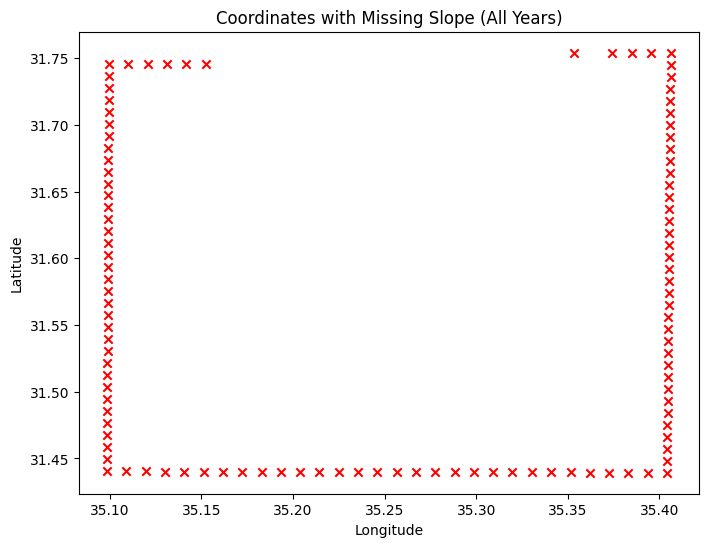

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Load the DataFrame of missing slope coordinates
#    (you created this from the "AllMissingSlopeCoords.csv" or a variable)
missing_coords_df = pd.read_csv("/media/data-ssd/PINN/DATA/model data after proccessing/full POC model/3 final files according to spatial PINN Hebrew/merged/nov2apr/event_base_dfs/remapping time dfs/AllMissingSlopeCoords.csv")

print(f"Loaded {missing_coords_df.shape[0]} missing-slope coords.")
print(missing_coords_df.head())

# 2) Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(
    x=missing_coords_df['longitude'],
    y=missing_coords_df['latitude'],
    c='red',
    marker='x'
)

# 3) Label, show
plt.title("Coordinates with Missing Slope (All Years)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# (Optional) If you want a bounding box:
# plt.xlim([35.0, 36.0])   # Just an example range
# plt.ylim([31.4, 31.8])

plt.show()


In [21]:
%%time
import os
import pandas as pd

# Path to your folder with the 8 CSV files
base_path = "/media/data-ssd/PINN/DATA/model data after proccessing/full POC model/3 final files according to spatial PINN Hebrew/merged/nov2apr/event_base_dfs/remapping time dfs"

# The 8 years we want to process
years = [2012, 2013, 2014, 2015, 2016, 2018, 2019, 2020]

for yr in years:
    file_name = f"Merged_North_Dead_Sea_{yr}_remapped.csv"
    file_path = os.path.join(base_path, file_name)

    if not os.path.exists(file_path):
        print(f"⚠️ File not found: {file_path}")
        continue

    print(f"\n=== YEAR {yr} ===")
    print(f"Reading: {file_path}")
    df = pd.read_csv(file_path)
    print("Initial shape:", df.shape)

    # Count missing slope before fill
    nan_count_before = df['slope_calculated'].isna().sum()
    print(f"Missing slope before fill: {nan_count_before}")

    # 1) Compute the mean slope of the NON-NaN cells
    mean_slope = df['slope_calculated'].mean(skipna=True)
    print(f"Mean slope (ignoring NaNs): {mean_slope:.4f}")

    # 2) Fill NaN with that mean slope
    df['slope_calculated'] = df['slope_calculated'].fillna(mean_slope)

    # 3) Verify no remaining NaN
    nan_count_after = df['slope_calculated'].isna().sum()
    print(f"Missing slope after fill: {nan_count_after}")

    # 4) Save new CSV
    out_name = f"Merged_North_Dead_Sea_{yr}_avgSlopeFill.csv"
    out_path = os.path.join(base_path, out_name)
    df.to_csv(out_path, index=False)
    print(f"Saved filled file -> {out_path}")



=== YEAR 2012 ===
Reading: /media/data-ssd/PINN/DATA/model data after proccessing/full POC model/3 final files according to spatial PINN Hebrew/merged/nov2apr/event_base_dfs/remapping time dfs/Merged_North_Dead_Sea_2012_remapped.csv
Initial shape: (1108800, 7)
Missing slope before fill: 113400
Mean slope (ignoring NaNs): 3.3764
Missing slope after fill: 0
Saved filled file -> /media/data-ssd/PINN/DATA/model data after proccessing/full POC model/3 final files according to spatial PINN Hebrew/merged/nov2apr/event_base_dfs/remapping time dfs/Merged_North_Dead_Sea_2012_avgSlopeFill.csv

=== YEAR 2013 ===
Reading: /media/data-ssd/PINN/DATA/model data after proccessing/full POC model/3 final files according to spatial PINN Hebrew/merged/nov2apr/event_base_dfs/remapping time dfs/Merged_North_Dead_Sea_2013_remapped.csv
Initial shape: (1785696, 7)
Missing slope before fill: 182628
Mean slope (ignoring NaNs): 3.3764
Missing slope after fill: 0
Saved filled file -> /media/data-ssd/PINN/DATA/mode

=== Year 2012 ===
Original shape: (1108800, 7)
Mean slope: 3.3764
Missing slope after fill: 0
Saved filled file -> /media/data-ssd/PINN/DATA/model data after proccessing/full POC model/3 final files according to spatial PINN Hebrew/merged/nov2apr/event_base_dfs/remapping time dfs/Merged_North_Dead_Sea_2012_avgSlopeFill.csv


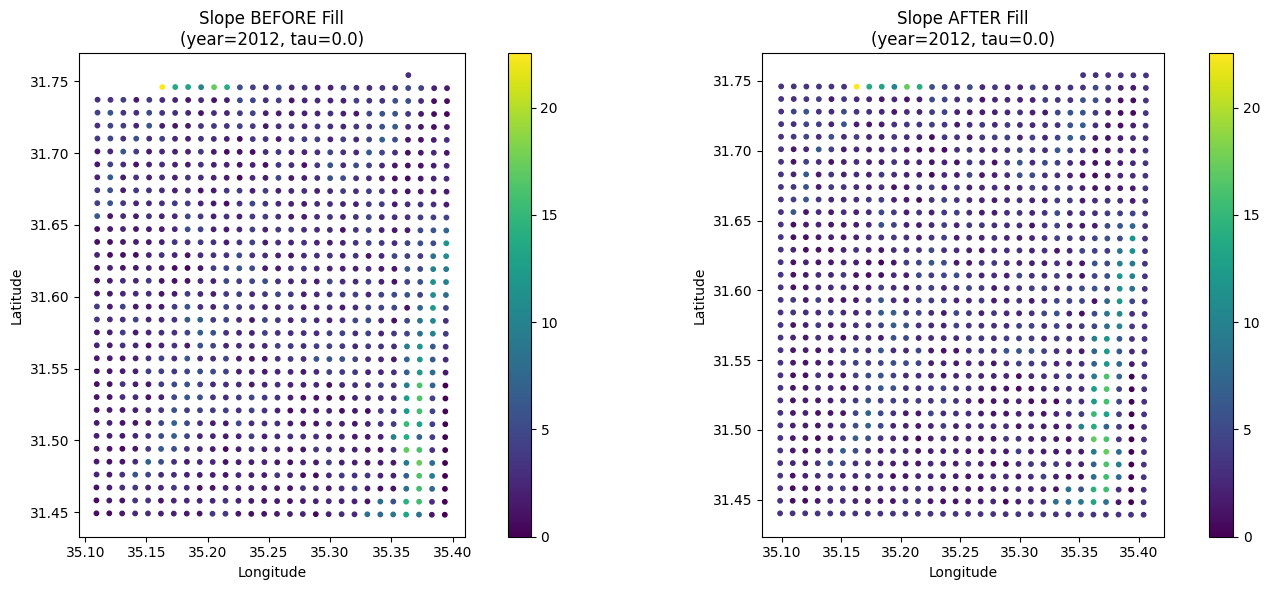

CPU times: user 3.65 s, sys: 358 ms, total: 4.01 s
Wall time: 3.89 s


In [22]:
%%time
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

##########################
# 1) Read & Fill Slope
##########################
base_path = "/media/data-ssd/PINN/DATA/model data after proccessing/full POC model/3 final files according to spatial PINN Hebrew/merged/nov2apr/event_base_dfs/remapping time dfs"
year = 2012  # change to any of [2012,2013,2014,2015,2016,2018,2019,2020]

file_in = f"Merged_North_Dead_Sea_{year}_remapped.csv"
path_in = os.path.join(base_path, file_in)

df_orig = pd.read_csv(path_in)
print(f"=== Year {year} ===")
print(f"Original shape: {df_orig.shape}")

# 1a) Mean slope ignoring NaNs
mean_slope = df_orig['slope_calculated'].mean(skipna=True)
print(f"Mean slope: {mean_slope:.4f}")

# 1b) Fill NaNs with mean
df_filled = df_orig.copy()
df_filled['slope_calculated'] = df_filled['slope_calculated'].fillna(mean_slope)

# Verify no NaNs remain
missing_after = df_filled['slope_calculated'].isna().sum()
print(f"Missing slope after fill: {missing_after}")

# 1c) Save the new CSV
file_out = f"Merged_North_Dead_Sea_{year}_avgSlopeFill.csv"
path_out = os.path.join(base_path, file_out)
df_filled.to_csv(path_out, index=False)
print(f"Saved filled file -> {path_out}")


##########################
# 2) Visualization
##########################
# We'll pick a single time step (tau) to display before vs. after
unique_taus = sorted(df_orig['tau'].unique())
if len(unique_taus) == 0:
    print("No tau values found! Skipping plot.")
else:
    tau_to_plot = unique_taus[0]  # e.g., first time step

    # 2a) Slice original & filled data
    df_orig_tau = df_orig[df_orig['tau'] == tau_to_plot].copy()
    df_fill_tau = df_filled[df_filled['tau'] == tau_to_plot].copy()

    # 2b) Convert each slice to a GeoDataFrame
    gdf_orig = gpd.GeoDataFrame(
        df_orig_tau,
        geometry=gpd.points_from_xy(df_orig_tau.longitude, df_orig_tau.latitude),
        crs="EPSG:4326"
    )
    gdf_fill = gpd.GeoDataFrame(
        df_fill_tau,
        geometry=gpd.points_from_xy(df_fill_tau.longitude, df_fill_tau.latitude),
        crs="EPSG:4326"
    )

    # 2c) Plot side-by-side
    def plot_gdf(ax, gdf, col, title):
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.1)
        gdf.plot(column=col, cmap='viridis', legend=True, ax=ax, cax=cax, markersize=10)
        ax.set_title(title)
        ax.set_xlabel("Longitude")
        ax.set_ylabel("Latitude")

    fig, axes = plt.subplots(1, 2, figsize=(14,6))

    plot_gdf(
        axes[0],
        gdf_orig,
        col='slope_calculated',
        title=f"Slope BEFORE Fill\n(year={year}, tau={tau_to_plot})"
    )
    plot_gdf(
        axes[1],
        gdf_fill,
        col='slope_calculated',
        title=f"Slope AFTER Fill\n(year={year}, tau={tau_to_plot})"
    )

    plt.tight_layout()
    plt.show()



=== YEAR 2012 ===
Reading: /media/data-ssd/PINN/DATA/model data after proccessing/full POC model/3 final files according to spatial PINN Hebrew/merged/nov2apr/event_base_dfs/remapping time dfs/with avg slope(instead nan)/Merged_North_Dead_Sea_2012_avgSlopeFill.csv
Shape: (1108800, 7)
NaN slope count: 0 (should be 0)


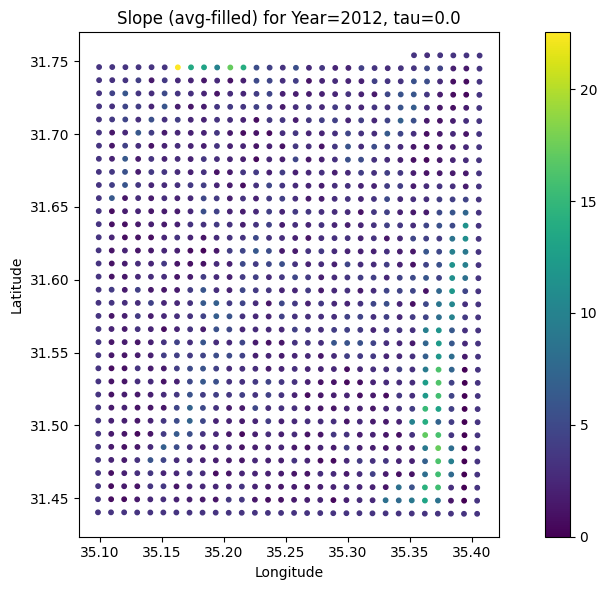


=== YEAR 2013 ===
Reading: /media/data-ssd/PINN/DATA/model data after proccessing/full POC model/3 final files according to spatial PINN Hebrew/merged/nov2apr/event_base_dfs/remapping time dfs/with avg slope(instead nan)/Merged_North_Dead_Sea_2013_avgSlopeFill.csv
Shape: (1785696, 7)
NaN slope count: 0 (should be 0)


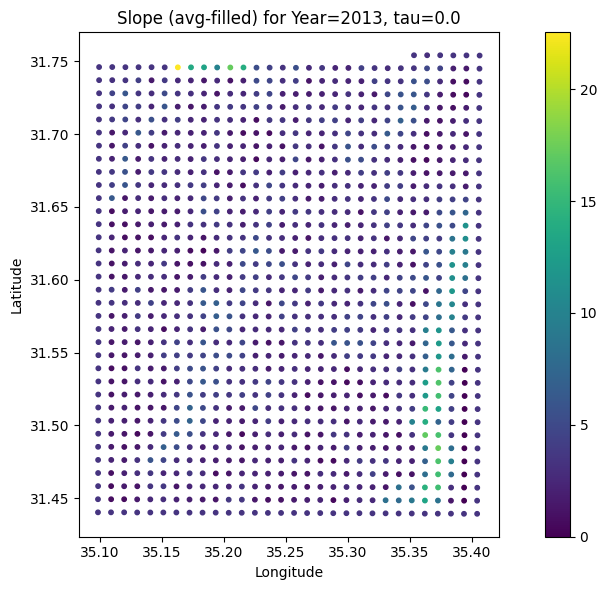


=== YEAR 2014 ===
Reading: /media/data-ssd/PINN/DATA/model data after proccessing/full POC model/3 final files according to spatial PINN Hebrew/merged/nov2apr/event_base_dfs/remapping time dfs/with avg slope(instead nan)/Merged_North_Dead_Sea_2014_avgSlopeFill.csv
Shape: (1673760, 7)
NaN slope count: 0 (should be 0)


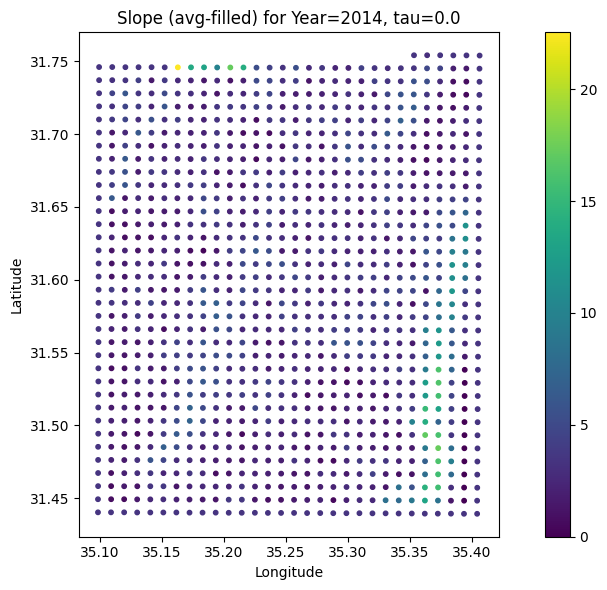


=== YEAR 2015 ===
Reading: /media/data-ssd/PINN/DATA/model data after proccessing/full POC model/3 final files according to spatial PINN Hebrew/merged/nov2apr/event_base_dfs/remapping time dfs/with avg slope(instead nan)/Merged_North_Dead_Sea_2015_avgSlopeFill.csv
Shape: (1709664, 7)
NaN slope count: 0 (should be 0)


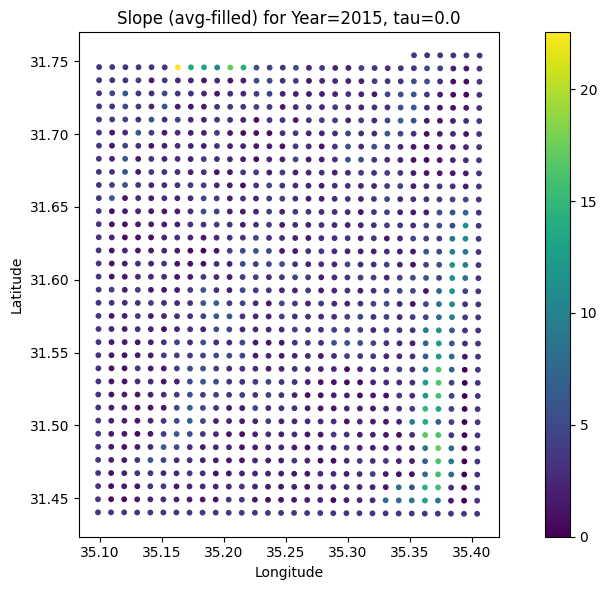


=== YEAR 2016 ===
Reading: /media/data-ssd/PINN/DATA/model data after proccessing/full POC model/3 final files according to spatial PINN Hebrew/merged/nov2apr/event_base_dfs/remapping time dfs/with avg slope(instead nan)/Merged_North_Dead_Sea_2016_avgSlopeFill.csv
Shape: (598752, 7)
NaN slope count: 0 (should be 0)


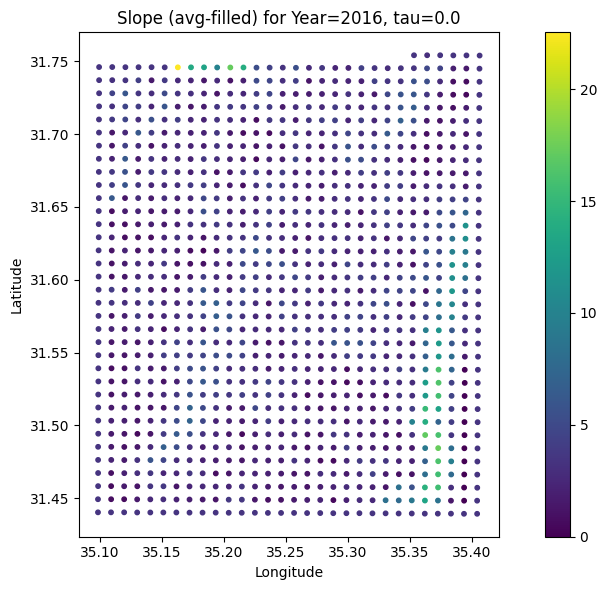


=== YEAR 2018 ===
Reading: /media/data-ssd/PINN/DATA/model data after proccessing/full POC model/3 final files according to spatial PINN Hebrew/merged/nov2apr/event_base_dfs/remapping time dfs/with avg slope(instead nan)/Merged_North_Dead_Sea_2018_avgSlopeFill.csv
Shape: (1680096, 7)
NaN slope count: 0 (should be 0)


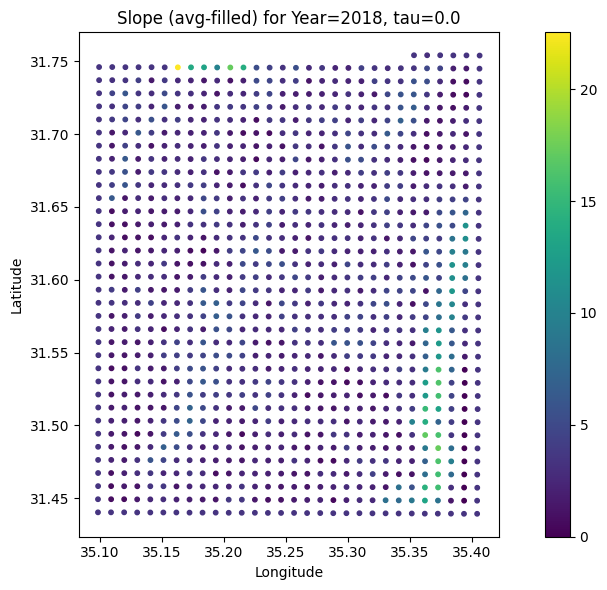


=== YEAR 2019 ===
Reading: /media/data-ssd/PINN/DATA/model data after proccessing/full POC model/3 final files according to spatial PINN Hebrew/merged/nov2apr/event_base_dfs/remapping time dfs/with avg slope(instead nan)/Merged_North_Dead_Sea_2019_avgSlopeFill.csv
Shape: (1086624, 7)
NaN slope count: 0 (should be 0)


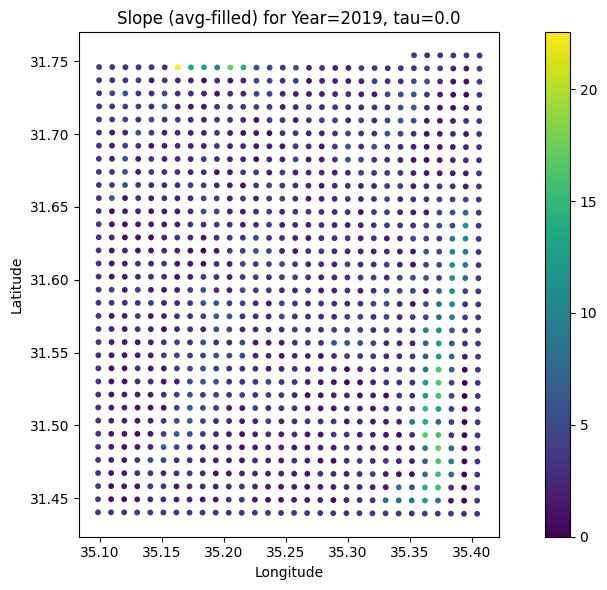


=== YEAR 2020 ===
Reading: /media/data-ssd/PINN/DATA/model data after proccessing/full POC model/3 final files according to spatial PINN Hebrew/merged/nov2apr/event_base_dfs/remapping time dfs/with avg slope(instead nan)/Merged_North_Dead_Sea_2020_avgSlopeFill.csv
Shape: (1726560, 7)
NaN slope count: 0 (should be 0)


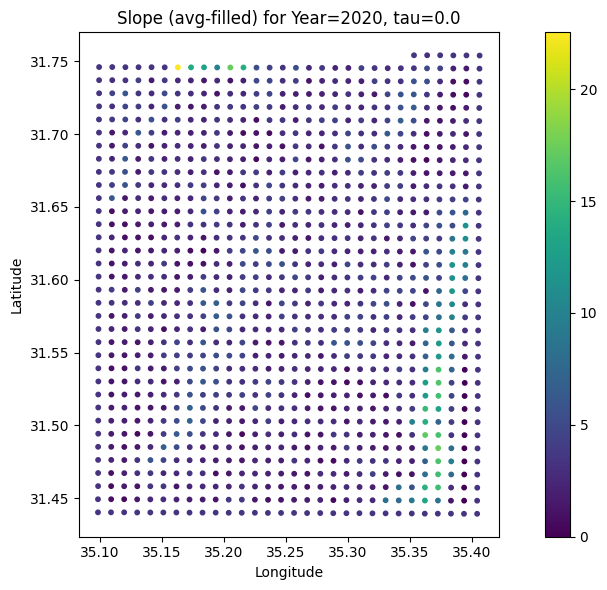

CPU times: user 4.9 s, sys: 1.65 s, total: 6.55 s
Wall time: 4.91 s


In [23]:
%%time
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable

# 1) Directory containing your 8 new CSV files with average slope fill
avg_slope_dir = "/media/data-ssd/PINN/DATA/model data after proccessing/full POC model/3 final files according to spatial PINN Hebrew/merged/nov2apr/event_base_dfs/remapping time dfs/with avg slope(instead nan)"

years = [2012, 2013, 2014, 2015, 2016, 2018, 2019, 2020]

def plot_slope(ax, gdf, title):
    """
    Plot slope_calculated in a GeoDataFrame with a colorbar.
    """
    # We'll manually create a colorbar using a separate axis
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    
    gdf.plot(
        column='slope_calculated',
        cmap='viridis',
        legend=True,
        ax=ax,
        cax=cax,
        markersize=10
    )
    ax.set_title(title)
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")

for yr in years:
    csv_name = f"Merged_North_Dead_Sea_{yr}_avgSlopeFill.csv"
    file_path = os.path.join(avg_slope_dir, csv_name)

    if not os.path.exists(file_path):
        print(f"⚠️ File not found: {file_path}")
        continue

    print(f"\n=== YEAR {yr} ===")
    print(f"Reading: {file_path}")
    df = pd.read_csv(file_path)
    print("Shape:", df.shape)

    # Verify slope has no NaNs
    nan_count = df['slope_calculated'].isna().sum()
    print(f"NaN slope count: {nan_count} (should be 0)")

    # Sort all tau values
    unique_taus = sorted(df['tau'].unique())
    if len(unique_taus) == 0:
        print("No tau found, skipping plot.")
        continue
    
    # Pick the first time step
    first_tau = unique_taus[0]
    df_slice = df[df['tau'] == first_tau].copy()

    # Convert to GeoDataFrame
    gdf_slice = gpd.GeoDataFrame(
        df_slice,
        geometry=gpd.points_from_xy(df_slice['longitude'], df_slice['latitude']),
        crs="EPSG:4326"
    )

    # Plot
    fig, ax = plt.subplots(figsize=(8,6))
    plot_slope(
        ax,
        gdf_slice,
        title=f"Slope (avg-filled) for Year={yr}, tau={first_tau}"
    )
    plt.tight_layout()
    plt.show()


In [50]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from IPython.display import HTML

############################################
# 1) Paths and Data Setup
############################################

# Directory with your 2013 CSV
base_path = "/media/data-ssd/PINN/DATA/model data after proccessing/full POC model/3 final files according to spatial PINN Hebrew/merged/nov2apr/event_base_dfs/remapping time dfs/with avg slope(instead nan)"
year = 2013
file_name = f"Merged_North_Dead_Sea_{year}_avgSlopeFill.csv"
file_path = os.path.join(base_path, file_name)

# Read the CSV (no date parsing, since we have 'tau')
df_2013 = pd.read_csv(file_path)
print("Data shape:", df_2013.shape)
print("Columns:", df_2013.columns)

# Unique tau values in ascending order
taus = sorted(df_2013["tau"].unique())
print(f"Number of time steps (tau) found: {len(taus)}")

############################################
# 2) Set up the Figure and Scatter Objects
############################################
fig, ax = plt.subplots(figsize=(8, 6))

# We'll create two scatter plots:
# - sc_rain: domain points colored by "rainrate"
# - sc_discharge: domain points with non-NaN "rg_qms"
#   (the same coordinates if 'rg_qms' is measured at only 3 stations)
sc_rain = ax.scatter([], [], c=[], cmap="Blues", vmin=0, vmax=df_2013["rainrate"].max())
sc_discharge = ax.scatter([], [], c=[], cmap="Reds", vmin=0, vmax=df_2013["rg_qms"].max())

# Set axis bounds: min/max of longitude & latitude
ax.set_xlim(df_2013["longitude"].min(), df_2013["longitude"].max())
ax.set_ylim(df_2013["latitude"].min(), df_2013["latitude"].max())

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
title = ax.set_title("Rain & Discharge Animation (tau=? )")

# Add colorbars for rain and discharge
cbar_rain = plt.colorbar(sc_rain, ax=ax, label="Rainrate")
cbar_discharge = plt.colorbar(sc_discharge, ax=ax, label="Discharge (rg_qms)")

############################################
# 3) Define the Update Function for Animation
############################################
def update(frame):
    current_tau = taus[frame]
    
    # Subset for this tau
    subset = df_2013[df_2013["tau"] == current_tau]
    
    # --- Update the RAIN scatter ---
    #  All points in the domain (N up to 1056?), colored by 'rainrate'
    coords_rain = np.column_stack((subset["longitude"], subset["latitude"]))
    rain_vals = subset["rainrate"].values
    
    sc_rain.set_offsets(coords_rain)
    sc_rain.set_array(rain_vals)

    # --- Update the DISCHARGE scatter ---
    # Filter only rows with non-NaN rg_qms
    discharge_subset = subset.dropna(subset=["rg_qms"])
    coords_discharge = np.column_stack((discharge_subset["longitude"], discharge_subset["latitude"]))
    discharge_vals = discharge_subset["rg_qms"].values

    sc_discharge.set_offsets(coords_discharge)
    sc_discharge.set_array(discharge_vals)
    
    # Update the title to show current tau
    title.set_text(f"Rain & Discharge Animation - tau={current_tau:.3f}")

    return sc_rain, sc_discharge, title

############################################
# 4) Create and Display the Animation
############################################
ani = animation.FuncAnimation(
    fig,
    update,
    frames=len(taus),
    interval=200,   # ms between frames
    repeat=True,
    blit=False      # if True, must return exact artists
)

# In Jupyter, display inline
HTML(ani.to_jshtml())
# or HTML(ani.to_html5_video())

# If you want to save as MP4:
# ani.save("rain_discharge_2013.mp4", fps=5, dpi=100)


FileNotFoundError: [Errno 2] No such file or directory: '/media/data-ssd/PINN/DATA/model data after proccessing/full POC model/3 final files according to spatial PINN Hebrew/merged/nov2apr/event_base_dfs/remapping time dfs/with avg slope(instead nan)/Merged_North_Dead_Sea_2013_avgSlopeFill.csv'

In [41]:
%%time
import os, time
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

################################################################################
# 1) Load Data (Train Years: 2012, 2013, 2014, 2015)
################################################################################

# Correct base path as provided by you:
base_path = "/media/data-ssd/PINN/DATA/model data after proccessing/full POC model/3 final files according to spatial PINN Hebrew/merged/nov2apr/event_base_dfs/remapping time dfs/with avg slope(instead nan)"

years_train = [2012, 2013, 2014, 2015]

def load_years(years):
    dfs = []
    for yr in years:
        csv_file = os.path.join(base_path, f"Merged_North_Dead_Sea_{yr}_avgSlopeFill.csv")
        df = pd.read_csv(csv_file)
        df["year"] = yr
        dfs.append(df)
    return pd.concat(dfs, ignore_index=True)

df_train = load_years(years_train)
print("Train shape (raw):", df_train.shape)

################################################################################
# 2) Identify Station Coordinates
################################################################################
# Here we check which lat-lon have valid rg_qms (only 3 stations)
station_coords = df_train[~df_train["rg_qms"].isna()][["latitude","longitude"]].drop_duplicates()
print(f"Found {len(station_coords)} station coords in train data.")

################################################################################
# 3) Build a Uniform Time Axis & Pixel Index
################################################################################

unique_taus = sorted(df_train["tau"].unique())
tau_to_idx = {tau_val: i for i, tau_val in enumerate(unique_taus)}
T = len(unique_taus)
print("Number of distinct time steps T:", T)

all_coords = df_train[["latitude","longitude"]].drop_duplicates().reset_index(drop=True)
all_coords = all_coords.values  # shape (N, 2)
N = len(all_coords)
print("Number of lat-lon pixels N:", N)

coord_to_idx = { (la, lo): i for i, (la, lo) in enumerate(all_coords) }

################################################################################
# 4) Build CPU Arrays: X_input, Y, mask
################################################################################
# We use features: [rainrate, slope_calculated, elevation, latitude, longitude, tau]
input_dim = 6
X_input = np.zeros((N, T, input_dim), dtype=np.float32)
Y = np.zeros((N, T), dtype=np.float32)
mask = np.zeros((N, T), dtype=np.float32)

# Precompute static features (slope, elevation) per pixel using the first available row:
df_first = df_train.groupby(["latitude","longitude"]).first().reset_index()
coord_slope = {}
coord_elev  = {}
for _, row in df_first.iterrows():
    la, lo = row["latitude"], row["longitude"]
    slp = row["slope_calculated"]
    elv = row["elevation"] if "elevation" in row else 0.0
    coord_slope[(la, lo)] = slp
    coord_elev[(la, lo)]  = elv

# Fill in the arrays based on each row of df_train
for idx, row in df_train.iterrows():
    la, lo = row["latitude"], row["longitude"]
    i = coord_to_idx[(la, lo)]
    tau_val = row["tau"]
    t = tau_to_idx[tau_val]
    rain = row["rainrate"]
    slope = coord_slope[(la, lo)]
    elev  = coord_elev[(la, lo)]
    X_input[i, t, 0] = rain
    X_input[i, t, 1] = slope
    X_input[i, t, 2] = elev
    X_input[i, t, 3] = la
    X_input[i, t, 4] = lo
    X_input[i, t, 5] = tau_val
    
    q = row["rg_qms"]
    if pd.notna(q):
        Y[i, t] = q
        mask[i, t] = 1.0

# Convert to torch tensors (keep on CPU for now)
print("X_input shape:", X_input.shape, "Y shape:", Y.shape)

################################################################################
# 5) Define the Domain LSTM Model
################################################################################
class DomainLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim=128, num_layers=2):
        super(DomainLSTM, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc   = nn.Linear(hidden_dim, 1)
    
    def forward(self, x):
        # x: (batch_size, T, input_dim)
        out, _ = self.lstm(x)
        discharge = self.fc(out)  # (batch_size, T, 1)
        return discharge.squeeze(-1)  # (batch_size, T)

model = DomainLSTM(input_dim=6, hidden_dim=128, num_layers=2).float().cuda()
print(model)

################################################################################
# 6) Define Masked MSE Loss Function
################################################################################
def masked_mse(pred, target, mask):
    sq_err = (pred - target)**2
    masked_err = sq_err * mask
    total_error = masked_err.sum()
    count = mask.sum()
    return total_error / count if count.item() > 0 else torch.tensor(0.0, device=pred.device)

################################################################################
# 7) Training Loop with Mini-Batching Over Pixels
################################################################################
optimizer = optim.Adam(model.parameters(), lr=1e-3)
num_epochs = 5
BATCH_SIZE = 64  # mini-batch over lat-lon pixels

start_time = time.time()

for epoch in range(num_epochs):
    epoch_start = time.time()
    model.train()
    running_loss = 0.0
    total_pixels = 0
    
    for batch_start in range(0, N, BATCH_SIZE):
        batch_end = min(batch_start + BATCH_SIZE, N)
        bs = batch_end - batch_start
        
        # Get mini-batch from CPU arrays and move to GPU
        x_batch_np = X_input[batch_start:batch_end, :, :]  # (bs, T, 6)
        y_batch_np = Y[batch_start:batch_end, :]           # (bs, T)
        m_batch_np = mask[batch_start:batch_end, :]          # (bs, T)
        
        x_batch = torch.tensor(x_batch_np, device="cuda")
        y_batch = torch.tensor(y_batch_np, device="cuda")
        m_batch = torch.tensor(m_batch_np, device="cuda")
        
        optimizer.zero_grad()
        pred = model(x_batch)  # (bs, T)
        loss = masked_mse(pred, y_batch, m_batch)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=10.0)
        optimizer.step()
        
        running_loss += loss.item() * bs
        total_pixels += bs
        
    epoch_loss = running_loss / total_pixels
    epoch_time = time.time() - epoch_start
    elapsed = time.time() - start_time
    remaining = (num_epochs - (epoch+1)) * epoch_time
    print(f"Epoch {epoch+1}/{num_epochs} | Loss={epoch_loss:.4f} | "
          f"Epoch Time={epoch_time:.2f}s | Elapsed={elapsed:.2f}s | Rem={remaining:.2f}s")

total_time = time.time() - start_time
print(f"Training complete. Total time: {total_time:.2f}s")

################################################################################
# 8) Sample Station Prediction Plot
################################################################################
model.eval()
# Find a station pixel (we know there are only 3 station coordinates)
# We'll choose the first station coordinate from station_coords.
st_lat, st_lon = station_coords.iloc[0]
st_index = None
for i in range(N):
    if np.isclose(all_coords[i][0], st_lat) and np.isclose(all_coords[i][1], st_lon):
        st_index = i
        break

if st_index is None:
    print("Station not found in domain index!")
else:
    x_station_np = X_input[st_index:st_index+1, :, :]  # (1, T, 6)
    x_station = torch.tensor(x_station_np, device="cuda")
    with torch.no_grad():
        pred_station = model(x_station).cpu().numpy()[0]  # (T,)
    true_station = Y[st_index]   # (T,)
    mask_station = mask[st_index]  # (T,)
    
    t_idx = np.where(mask_station == 1)[0]
    
    plt.figure(figsize=(8,5))
    plt.plot(t_idx, true_station[t_idx], 'b.-', label="True discharge")
    plt.plot(t_idx, pred_station[t_idx], 'r.--', label="Pred discharge")
    plt.title(f"Station at lat={st_lat}, lon={st_lon}")
    plt.xlabel("Time index (tau index)")
    plt.ylabel("Discharge")
    plt.legend()
    plt.show()


Train shape (raw): (6277920, 8)
Found 3 station coords in train data.
Number of distinct time steps T: 5937
Number of lat-lon pixels N: 1056
X_input shape: (1056, 5937, 6) Y shape: (1056, 5937)
DomainLSTM(
  (lstm): LSTM(6, 128, num_layers=2, batch_first=True)
  (fc): Linear(in_features=128, out_features=1, bias=True)
)


RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

Train shape (raw): (6277920, 8)
Found 3 station coords in train data.
Number of distinct time steps T: 5937
Number of lat-lon pixels N: 1056
X_input shape: (1056, 5937, 6) Y shape: (1056, 5937)
DomainLSTM(
  (lstm): LSTM(6, 128, num_layers=2, batch_first=True)
  (fc): Linear(in_features=128, out_features=1, bias=True)
)
Epoch 1/5 | Loss=2.4332 | EpochTime=1.29s | Elapsed=1.29s | Rem=5.18s
Epoch 2/5 | Loss=2.3316 | EpochTime=1.23s | Elapsed=2.53s | Rem=3.70s
Epoch 3/5 | Loss=2.2935 | EpochTime=1.25s | Elapsed=3.78s | Rem=2.50s
Epoch 4/5 | Loss=2.3415 | EpochTime=1.24s | Elapsed=5.02s | Rem=1.24s
Epoch 5/5 | Loss=2.2856 | EpochTime=1.24s | Elapsed=6.25s | Rem=0.00s
Training complete. Total time: 6.25s


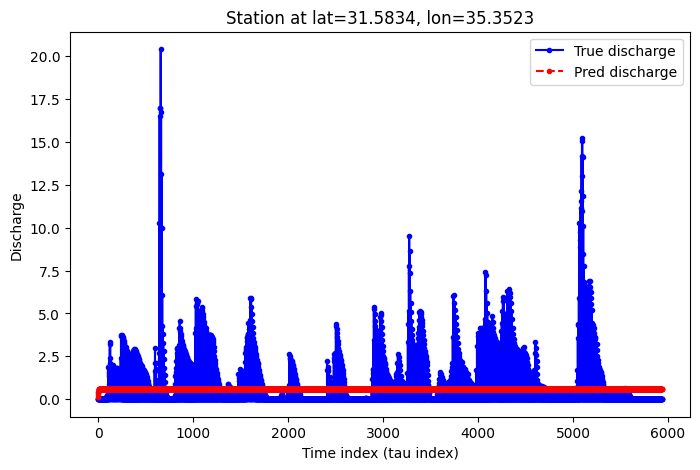

CPU times: user 2min 12s, sys: 511 ms, total: 2min 13s
Wall time: 2min 12s


In [42]:
%%time
import os, time
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

################################################################################
# 1) Load Data (Train Years: 2012, 2013, 2014, 2015)
################################################################################

base_path = "/media/data-ssd/PINN/DATA/model data after proccessing/full POC model/3 final files according to spatial PINN Hebrew/merged/nov2apr/event_base_dfs/remapping time dfs/with avg slope(instead nan)"
years_train = [2012, 2013, 2014, 2015]

def load_years(years):
    dfs = []
    for yr in years:
        csv_file = os.path.join(base_path, f"Merged_North_Dead_Sea_{yr}_avgSlopeFill.csv")
        df = pd.read_csv(csv_file)
        df["year"] = yr
        dfs.append(df)
    return pd.concat(dfs, ignore_index=True)

df_train = load_years(years_train)
print("Train shape (raw):", df_train.shape)

################################################################################
# 2) Identify Station Coordinates
################################################################################
# Only 3 pixels have valid discharge (rg_qms)
station_coords = df_train[~df_train["rg_qms"].isna()][["latitude","longitude"]].drop_duplicates()
print(f"Found {len(station_coords)} station coords in train data.")

################################################################################
# 3) Build Uniform Time Axis & Pixel Index
################################################################################

unique_taus = sorted(df_train["tau"].unique())
tau_to_idx = {tau_val: i for i, tau_val in enumerate(unique_taus)}
T = len(unique_taus)
print("Number of distinct time steps T:", T)

all_coords = df_train[["latitude","longitude"]].drop_duplicates().reset_index(drop=True)
all_coords = all_coords.values  # shape (N, 2)
N = len(all_coords)
print("Number of lat-lon pixels N:", N)

coord_to_idx = { (la, lo): i for i, (la, lo) in enumerate(all_coords) }

################################################################################
# 4) Build CPU Arrays: X_input, Y, mask
################################################################################
# Features: [rainrate, slope_calculated, elevation, latitude, longitude, tau]
input_dim = 6
X_input = np.zeros((N, T, input_dim), dtype=np.float32)
Y = np.zeros((N, T), dtype=np.float32)
mask = np.zeros((N, T), dtype=np.float32)

# Precompute static features (slope, elevation) per pixel from the first available row
df_first = df_train.groupby(["latitude","longitude"]).first().reset_index()
coord_slope = {}
coord_elev  = {}
for _, row in df_first.iterrows():
    la, lo = row["latitude"], row["longitude"]
    slp = row["slope_calculated"]
    elv = row["elevation"] if "elevation" in row else 0.0
    coord_slope[(la, lo)] = slp
    coord_elev[(la, lo)]  = elv

# Fill in the arrays using each row of df_train
for idx, row in df_train.iterrows():
    la, lo = row["latitude"], row["longitude"]
    i = coord_to_idx[(la, lo)]
    tau_val = row["tau"]
    t = tau_to_idx[tau_val]
    rain = row["rainrate"]
    slope = coord_slope[(la, lo)]
    elev  = coord_elev[(la, lo)]
    X_input[i, t, 0] = rain
    X_input[i, t, 1] = slope
    X_input[i, t, 2] = elev
    X_input[i, t, 3] = la
    X_input[i, t, 4] = lo
    X_input[i, t, 5] = tau_val
    
    q = row["rg_qms"]
    if pd.notna(q):
        Y[i, t] = q
        mask[i, t] = 1.0

print("X_input shape:", X_input.shape, "Y shape:", Y.shape)

################################################################################
# 5) Define the Domain LSTM Model
################################################################################

class DomainLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim=128, num_layers=2):
        super(DomainLSTM, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 1)
    
    def forward(self, x):
        # x: (batch_size, T, input_dim)
        out, _ = self.lstm(x)
        discharge = self.fc(out)  # shape: (batch_size, T, 1)
        return discharge.squeeze(-1)  # -> (batch_size, T)

model = DomainLSTM(input_dim=6, hidden_dim=128, num_layers=2).float().cuda()
print(model)

################################################################################
# 6) Define Masked MSE Loss Function (Differentiable even if mask sum is 0)
################################################################################

def masked_mse(pred, target, mask):
    # pred, target, mask: shape (batch_size, T)
    sq_err = (pred - target)**2
    masked_err = sq_err * mask
    total_error = masked_err.sum()
    count = mask.sum()
    return total_error / (count + 1e-8)

################################################################################
# 7) Training Loop with Mini-Batching Over Pixels
################################################################################

optimizer = optim.Adam(model.parameters(), lr=1e-3)
num_epochs = 5
BATCH_SIZE = 64  # mini-batch over spatial pixels

start_time = time.time()

for epoch in range(num_epochs):
    epoch_start = time.time()
    model.train()
    running_loss = 0.0
    total_pixels = 0
    
    # Mini-batch over the spatial dimension (lat-lon)
    for batch_start in range(0, N, BATCH_SIZE):
        batch_end = min(batch_start + BATCH_SIZE, N)
        bs = batch_end - batch_start
        
        x_batch_np = X_input[batch_start:batch_end, :, :]  # (bs, T, 6)
        y_batch_np = Y[batch_start:batch_end, :]           # (bs, T)
        m_batch_np = mask[batch_start:batch_end, :]          # (bs, T)
        
        x_batch = torch.tensor(x_batch_np, device="cuda")
        y_batch = torch.tensor(y_batch_np, device="cuda")
        m_batch = torch.tensor(m_batch_np, device="cuda")
        
        optimizer.zero_grad()
        pred = model(x_batch)  # shape: (bs, T)
        loss = masked_mse(pred, y_batch, m_batch)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=10.0)
        optimizer.step()
        
        running_loss += loss.item() * bs
        total_pixels += bs
    
    epoch_loss = running_loss / total_pixels
    epoch_time = time.time() - epoch_start
    elapsed = time.time() - start_time
    remaining = (num_epochs - (epoch+1)) * epoch_time
    print(f"Epoch {epoch+1}/{num_epochs} | Loss={epoch_loss:.4f} | "
          f"EpochTime={epoch_time:.2f}s | Elapsed={elapsed:.2f}s | Rem={remaining:.2f}s")

total_time = time.time() - start_time
print(f"Training complete. Total time: {total_time:.2f}s")

################################################################################
# 8) Sample Station Prediction Plot
################################################################################
model.eval()
# Find a station pixel (we know there are 3 station coords)
# We'll choose the first station from station_coords.
st_lat, st_lon = station_coords.iloc[0]
st_index = None
for i in range(N):
    if np.isclose(all_coords[i][0], st_lat) and np.isclose(all_coords[i][1], st_lon):
        st_index = i
        break

if st_index is None:
    print("Station not found in domain index!")
else:
    x_station_np = X_input[st_index:st_index+1, :, :]  # (1, T, 6)
    x_station = torch.tensor(x_station_np, device="cuda")
    with torch.no_grad():
        pred_station = model(x_station).cpu().numpy()[0]  # (T,)
    true_station = Y[st_index]   # (T,)
    mask_station = mask[st_index]  # (T,)
    
    t_idx = np.where(mask_station==1)[0]
    
    plt.figure(figsize=(8,5))
    plt.plot(t_idx, true_station[t_idx], 'b.-', label="True discharge")
    plt.plot(t_idx, pred_station[t_idx], 'r.--', label="Pred discharge")
    plt.title(f"Station at lat={st_lat}, lon={st_lon}")
    plt.xlabel("Time index (tau index)")
    plt.ylabel("Discharge")
    plt.legend()
    plt.show()


Train shape (raw): (6277920, 8)
Found 3 station coords in train data.
Number of distinct time steps T: 5937
Number of lat-lon pixels N: 1056
X_input shape: (1056, 5937, 6) Y_log shape: (1056, 5937)
DomainLSTM(
  (lstm): LSTM(6, 256, num_layers=2, batch_first=True)
  (fc): Linear(in_features=256, out_features=1, bias=True)
)
Epoch 1/50 | Loss=0.0804 | EpochTime=3.84s | Elapsed=3.84s | Rem=188.19s
Epoch 2/50 | Loss=0.1380 | EpochTime=3.78s | Elapsed=7.62s | Rem=181.38s
Epoch 3/50 | Loss=0.0678 | EpochTime=3.83s | Elapsed=11.45s | Rem=179.89s
Epoch 4/50 | Loss=0.0608 | EpochTime=3.79s | Elapsed=15.23s | Rem=174.12s
Epoch 5/50 | Loss=0.0525 | EpochTime=3.83s | Elapsed=19.06s | Rem=172.41s
Epoch 6/50 | Loss=0.0502 | EpochTime=3.79s | Elapsed=22.86s | Rem=166.91s
Epoch 7/50 | Loss=0.0577 | EpochTime=3.78s | Elapsed=26.63s | Rem=162.34s
Epoch 8/50 | Loss=0.0576 | EpochTime=3.77s | Elapsed=30.40s | Rem=158.41s
Epoch 9/50 | Loss=0.0576 | EpochTime=3.77s | Elapsed=34.18s | Rem=154.62s
Epoch 10/5

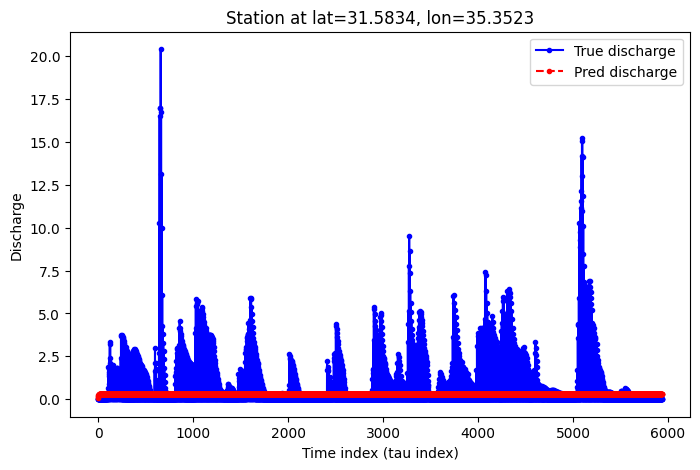

CPU times: user 4min 53s, sys: 30.6 s, total: 5min 24s
Wall time: 5min 24s


In [43]:
%%time
import os, time
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

################################################################################
# 1) Load Data (Train Years: 2012, 2013, 2014, 2015)
################################################################################

base_path = "/media/data-ssd/PINN/DATA/model data after proccessing/full POC model/3 final files according to spatial PINN Hebrew/merged/nov2apr/event_base_dfs/remapping time dfs/with avg slope(instead nan)"
years_train = [2012, 2013, 2014, 2015]

def load_years(years):
    dfs = []
    for yr in years:
        csv_file = os.path.join(base_path, f"Merged_North_Dead_Sea_{yr}_avgSlopeFill.csv")
        df = pd.read_csv(csv_file)
        df["year"] = yr
        dfs.append(df)
    return pd.concat(dfs, ignore_index=True)

df_train = load_years(years_train)
print("Train shape (raw):", df_train.shape)

################################################################################
# 2) Identify Station Coordinates
################################################################################
# Only 3 lat-lon have valid discharge
station_coords = df_train[~df_train["rg_qms"].isna()][["latitude","longitude"]].drop_duplicates()
print(f"Found {len(station_coords)} station coords in train data.")

################################################################################
# 3) Build Uniform Time Axis & Pixel Index
################################################################################

unique_taus = sorted(df_train["tau"].unique())
tau_to_idx = {tau_val: i for i, tau_val in enumerate(unique_taus)}
T = len(unique_taus)
print("Number of distinct time steps T:", T)

all_coords = df_train[["latitude","longitude"]].drop_duplicates().reset_index(drop=True)
all_coords = all_coords.values  # shape (N, 2)
N = len(all_coords)
print("Number of lat-lon pixels N:", N)

coord_to_idx = { (la, lo): i for i, (la, lo) in enumerate(all_coords) }

################################################################################
# 4) Build CPU Arrays: X_input, Y_log, mask
################################################################################
# We'll do a log-transform for discharge: Y_log = log(rg_qms + 1).
# Then the model predicts these log-values. We store 0 in Y_log if no station data.

# Features: [rainrate, slope_calculated, elevation, latitude, longitude, tau]
input_dim = 6
X_input = np.zeros((N, T, input_dim), dtype=np.float32)
Y_log   = np.zeros((N, T), dtype=np.float32)  # store log(rg_qms+1)
mask    = np.zeros((N, T), dtype=np.float32)

# Precompute slope, elevation for each pixel from first row
df_first = df_train.groupby(["latitude","longitude"]).first().reset_index()
coord_slope = {}
coord_elev  = {}
for _, row in df_first.iterrows():
    la, lo = row["latitude"], row["longitude"]
    slp = row["slope_calculated"]
    elv = row["elevation"] if "elevation" in row else 0.0
    coord_slope[(la, lo)] = slp
    coord_elev[(la, lo)]  = elv

for idx, row in df_train.iterrows():
    la, lo = row["latitude"], row["longitude"]
    i = coord_to_idx[(la, lo)]
    tau_val = row["tau"]
    t = tau_to_idx[tau_val]
    # features
    rain = row["rainrate"]
    slope = coord_slope[(la, lo)]
    elev  = coord_elev[(la, lo)]
    
    X_input[i, t, 0] = rain
    X_input[i, t, 1] = slope
    X_input[i, t, 2] = elev
    X_input[i, t, 3] = la
    X_input[i, t, 4] = lo
    X_input[i, t, 5] = tau_val
    
    q = row["rg_qms"]
    if pd.notna(q):
        # log-transform
        Y_log[i, t] = np.log(q + 1.0)
        mask[i, t]  = 1.0

print("X_input shape:", X_input.shape, "Y_log shape:", Y_log.shape)

################################################################################
# 5) Domain LSTM
################################################################################
class DomainLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim=256, num_layers=2):
        super(DomainLSTM, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc   = nn.Linear(hidden_dim, 1)
    
    def forward(self, x):
        # x: (batch_size, T, input_dim)
        out, _ = self.lstm(x)        # shape: (batch_size, T, hidden_dim)
        discharge_log = self.fc(out) # shape: (batch_size, T, 1)
        return discharge_log.squeeze(-1)  # (batch_size, T)

model = DomainLSTM(input_dim=6, hidden_dim=256, num_layers=2).float().cuda()
print(model)

################################################################################
# 6) Masked MSE for Log(Discharge)
################################################################################

def masked_mse(pred, target, mask):
    # pred, target, mask => shape (bs, T)
    # We'll do an MSE in log-space
    sq_err = (pred - target)**2
    masked_err = sq_err * mask
    sse = masked_err.sum()
    cnt = mask.sum()
    return sse / (cnt + 1e-8)

################################################################################
# 7) Train with Pixel Mini-Batches
################################################################################

optimizer = optim.Adam(model.parameters(), lr=5e-4)
num_epochs = 50
BATCH_SIZE = 64

X_input_cpu = X_input  # shape (N, T, 6)
Y_log_cpu   = Y_log
mask_cpu    = mask

start_time = time.time()

for epoch in range(num_epochs):
    epoch_start = time.time()
    model.train()
    running_loss = 0.0
    total_pixels = 0
    
    # Shuffle pixel indices each epoch for random order
    perm = np.random.permutation(N)
    
    for batch_start in range(0, N, BATCH_SIZE):
        batch_end = min(batch_start + BATCH_SIZE, N)
        idxs = perm[batch_start:batch_end]
        bs = len(idxs)
        
        x_batch_np = X_input_cpu[idxs, :, :]  # shape (bs, T, 6)
        y_batch_np = Y_log_cpu[idxs, :]
        m_batch_np = mask_cpu[idxs, :]
        
        x_batch = torch.tensor(x_batch_np, device="cuda")
        y_batch = torch.tensor(y_batch_np, device="cuda")
        m_batch = torch.tensor(m_batch_np, device="cuda")
        
        optimizer.zero_grad()
        pred_log = model(x_batch)   # shape (bs, T), log discharge
        loss = masked_mse(pred_log, y_batch, m_batch)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=10.0)
        optimizer.step()
        
        running_loss += loss.item() * bs
        total_pixels += bs
    
    epoch_loss = running_loss / total_pixels
    epoch_time = time.time() - epoch_start
    elapsed = time.time() - start_time
    remaining = (num_epochs - (epoch+1)) * epoch_time
    
    print(f"Epoch {epoch+1}/{num_epochs} | Loss={epoch_loss:.4f} | "
          f"EpochTime={epoch_time:.2f}s | Elapsed={elapsed:.2f}s | Rem={remaining:.2f}s")

total_time = time.time() - start_time
print(f"Training complete. Total time: {total_time:.2f}s")

################################################################################
# 8) Sample Station Prediction
################################################################################
model.eval()
# We'll pick the first station from station_coords
st_lat, st_lon = station_coords.iloc[0]
st_index = None
for i in range(len(all_coords)):
    if np.isclose(all_coords[i][0], st_lat) and np.isclose(all_coords[i][1], st_lon):
        st_index = i
        break

if st_index is None:
    print("Station not found in domain index!")
else:
    x_station_np = X_input_cpu[st_index:st_index+1, :, :]  # (1, T, 6)
    x_station = torch.tensor(x_station_np, device="cuda")
    with torch.no_grad():
        pred_log_station = model(x_station).cpu().numpy()[0]  # (T,)
    # Convert log discharge to real discharge
    pred_discharge = np.exp(pred_log_station) - 1.0
    
    true_log_station = Y_log_cpu[st_index]  # shape (T,)
    mask_station = mask_cpu[st_index]       # shape (T,)
    # real discharge
    true_discharge = np.exp(true_log_station) - 1.0
    
    t_idx = np.where(mask_station == 1)[0]
    
    plt.figure(figsize=(8,5))
    plt.plot(t_idx, true_discharge[t_idx], 'b.-', label="True discharge")
    plt.plot(t_idx, pred_discharge[t_idx], 'r.--', label="Pred discharge")
    plt.title(f"Station at lat={st_lat}, lon={st_lon}")
    plt.xlabel("Time index (tau index)")
    plt.ylabel("Discharge")
    plt.legend()
    plt.show()


16:55:13 [INFO] Training on years: [2012, 2013, 2014, 2015]
16:55:15 [INFO] Loaded data shape for years [2012, 2013, 2014, 2015]: (6277920, 8)
16:55:16 [INFO] Created PINN model with friction PDE approach.
16:56:20 [INFO] Epoch 1/30, Loss=7.1113
16:57:25 [INFO] Epoch 2/30, Loss=7.7981
16:58:29 [INFO] Epoch 3/30, Loss=7.1232
16:59:34 [INFO] Epoch 4/30, Loss=7.1620
17:00:40 [INFO] Epoch 5/30, Loss=7.1340
17:01:44 [INFO] Epoch 6/30, Loss=7.0762
17:02:49 [INFO] Epoch 7/30, Loss=7.1070
17:03:56 [INFO] Epoch 8/30, Loss=7.0630
17:05:02 [INFO] Epoch 9/30, Loss=7.0772
17:06:06 [INFO] Epoch 10/30, Loss=7.1599
17:07:10 [INFO] Epoch 11/30, Loss=7.0580
17:08:15 [INFO] Epoch 12/30, Loss=7.0634
17:09:21 [INFO] Epoch 13/30, Loss=7.0500
17:10:25 [INFO] Epoch 14/30, Loss=7.0403
17:11:29 [INFO] Epoch 15/30, Loss=7.0825
17:12:33 [INFO] Epoch 16/30, Loss=7.0573
17:13:41 [INFO] Epoch 17/30, Loss=7.0451
17:14:46 [INFO] Epoch 18/30, Loss=7.0340
17:15:51 [INFO] Epoch 19/30, Loss=7.0665
17:16:56 [INFO] Epoch 20

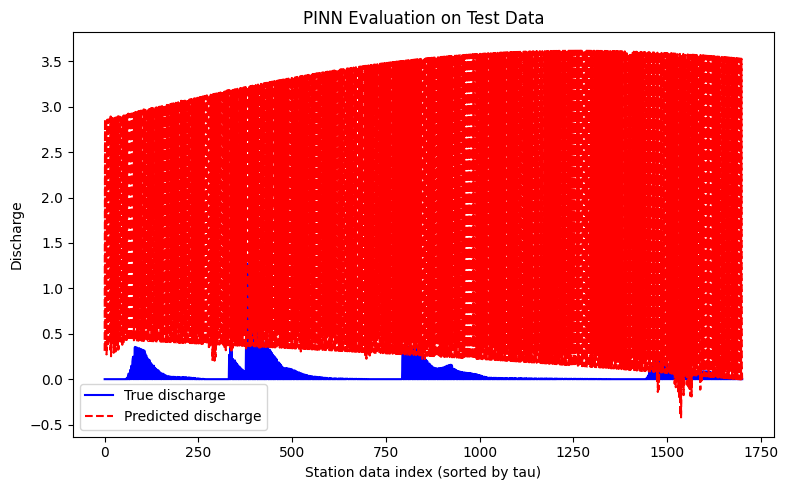

17:27:48 [INFO] Evaluating on test set:
17:27:49 [INFO] Loaded test data shape: (1086624, 7)


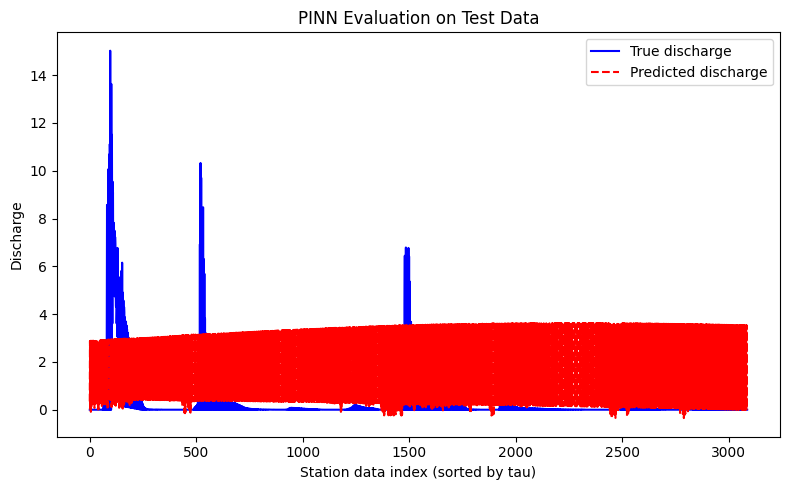

In [45]:
import logging
import time
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import os

###############################################################################
# LOGGING CONFIGURATION
###############################################################################
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s [%(levelname)s] %(message)s",
    datefmt='%H:%M:%S'
)
logger = logging.getLogger(__name__)

###############################################################################
# 1) PINN MODEL DEFINITION
###############################################################################
class SineActivation(nn.Module):
    def forward(self, x):
        return torch.sin(x)

class PINN(nn.Module):
    """
    A feed-forward neural network using Sine activations.
    Input features: [tau_norm, lat_norm, lon_norm, elevation, slope_calculated, rainrate].
    Output: Q (discharge) in scaled form.
    """
    def __init__(self, in_features=6, hidden_dim=128, out_features=1, num_layers=5):
        super(PINN, self).__init__()
        layers = []
        layers.append(nn.Linear(in_features, hidden_dim))
        layers.append(SineActivation())
        for _ in range(num_layers - 2):
            layers.append(nn.Linear(hidden_dim, hidden_dim))
            layers.append(SineActivation())
        layers.append(nn.Linear(hidden_dim, out_features))
        self.model = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.model(x)

###############################################################################
# 2) PDE WITH FRICTION
###############################################################################
def pde_with_friction(model, x, base_speed=1.0, slope_factor=0.01, friction_factor=0.01):
    """
    PDE residual: dQ/dtau + wave_speed*(dQ/dlon + dQ/dlat) - friction_factor*Q^2 - rain = 0
    wave_speed = base_speed + slope_factor*slope
    Input x columns: [tau_norm, lat_norm, lon_norm, elevation, slope_calculated, rainrate]
    """
    x.requires_grad_(True)  # ensure autograd tracking
    tau_norm = x[:, 0:1]
    lat_norm = x[:, 1:2]
    lon_norm = x[:, 2:3]
    slope    = x[:, 4:5]
    rain     = x[:, 5:6]
    Q = model(x)  # shape (batch, 1)

    dQ_dtau = torch.autograd.grad(Q, tau_norm, grad_outputs=torch.ones_like(Q),
                                  create_graph=True, retain_graph=True, allow_unused=True)[0]
    if dQ_dtau is None:
        dQ_dtau = torch.zeros_like(Q)
    dQ_dlat = torch.autograd.grad(Q, lat_norm, grad_outputs=torch.ones_like(Q),
                                  create_graph=True, retain_graph=True, allow_unused=True)[0]
    if dQ_dlat is None:
        dQ_dlat = torch.zeros_like(Q)
    dQ_dlon = torch.autograd.grad(Q, lon_norm, grad_outputs=torch.ones_like(Q),
                                  create_graph=True, retain_graph=True, allow_unused=True)[0]
    if dQ_dlon is None:
        dQ_dlon = torch.zeros_like(Q)
    wave_speed = base_speed + slope_factor * slope
    friction   = friction_factor * (Q**2)
    residual = dQ_dtau + wave_speed*(dQ_dlon + dQ_dlat) - friction - rain
    return residual

###############################################################################
# 3) DATA LOADING & PREPROCESSING FROM MULTIPLE YEARS
###############################################################################
def load_data_from_years(years, base_path):
    """
    Loads data from the given years and concatenates into a single DataFrame.
    Preprocessing:
      - Fills missing slope with mean.
      - Normalizes latitude and longitude: lat_norm = lat - lat_min, lon_norm = lon - lon_min.
      - Normalizes tau: tau_norm = tau - tau_min.
    Splits the data into station (with rg_qms) and collocation (without rg_qms).
    Scales station discharge by max discharge.
    Returns: concatenated DataFrame, station DataLoader, collocation DataLoader,
             device, max_q, lat_min, lon_min, tau_min.
    """
    dfs = []
    for yr in years:
        csv_file = os.path.join(base_path, f"Merged_North_Dead_Sea_{yr}_avgSlopeFill.csv")
        if not os.path.isfile(csv_file):
            logger.warning(f"File not found: {csv_file}")
            continue
        df = pd.read_csv(csv_file)
        df["year"] = yr
        dfs.append(df)
    if len(dfs) == 0:
        raise ValueError("No data files loaded.")
    df = pd.concat(dfs, ignore_index=True)
    logger.info(f"Loaded data shape for years {years}: {df.shape}")

    # Fill missing slope
    slope_mean = df["slope_calculated"].mean(skipna=True)
    df["slope_calculated"] = df["slope_calculated"].fillna(slope_mean)
    # Normalize lat, lon, and tau using the min from the training set
    lat_min = df["latitude"].min()
    lon_min = df["longitude"].min()
    tau_min = df["tau"].min()
    df["lat_norm"] = df["latitude"] - lat_min
    df["lon_norm"] = df["longitude"] - lon_min
    df["tau_norm"] = df["tau"] - tau_min

    # Split into station data and collocation data
    df_station = df[~df["rg_qms"].isna()].copy()
    df_colloc = df[df["rg_qms"].isna()].copy()
    # Optionally, sample PDE collocation data if very large:
    if len(df_colloc) > 500000:
        df_colloc = df_colloc.sample(n=500000, random_state=42)

    # Scale discharge in station data
    max_q = df_station["rg_qms"].max()
    eps = 1e-6
    df_station["rg_qms_scaled"] = df_station["rg_qms"]/(max_q+eps)

    feat_cols = ['tau_norm', 'lat_norm', 'lon_norm', 'elevation', 'slope_calculated', 'rainrate']
    X_st = df_station[feat_cols].values
    y_st = df_station[['rg_qms_scaled']].values
    X_coll = df_colloc[feat_cols].values

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    X_st_t = torch.tensor(X_st, dtype=torch.float32, requires_grad=True).to(device)
    y_st_t = torch.tensor(y_st, dtype=torch.float32).to(device)
    X_coll_t = torch.tensor(X_coll, dtype=torch.float32, requires_grad=True).to(device)

    station_ds = TensorDataset(X_st_t, y_st_t)
    station_loader = DataLoader(station_ds, batch_size=64, shuffle=True, num_workers=0)

    colloc_ds = TensorDataset(X_coll_t)
    colloc_loader = DataLoader(colloc_ds, batch_size=64, shuffle=True, num_workers=0)

    return df, station_loader, colloc_loader, device, max_q, lat_min, lon_min, tau_min

###############################################################################
# 4) TRAINING FUNCTION (TRAIN ON 4 YEARS)
###############################################################################
def train_pinn(train_years, base_path):
    logger.info(f"Training on years: {train_years}")
    df_train, station_loader, colloc_loader, device, max_q, lat_min, lon_min, tau_min = load_data_from_years(train_years, base_path)
    model = PINN(in_features=6, hidden_dim=128, out_features=1, num_layers=5).to(device)
    logger.info("Created PINN model with friction PDE approach.")
    mse_loss = nn.MSELoss()
    lambda_pde = 0.01
    friction_factor = 0.01
    num_epochs = 30
    base_speed = 1.0
    slope_factor = 0.01
    optimizer = optim.Adam(model.parameters(), lr=1e-3)

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        # Station loop: data loss + PDE residual at station points
        for (X_st, y_st) in station_loader:
            pred_st = model(X_st)
            loss_data = mse_loss(pred_st, y_st)
            res_st = pde_with_friction(model, X_st, base_speed=base_speed,
                                       slope_factor=slope_factor, friction_factor=friction_factor)
            loss_pde_st = torch.mean(res_st**2)
            total_loss = loss_data + lambda_pde * loss_pde_st
            optimizer.zero_grad()
            total_loss.backward()
            optimizer.step()
            running_loss += total_loss.item()

        # Collocation loop: PDE residual only on unlabeled domain points
        for (X_coll,) in colloc_loader:
            res_coll = pde_with_friction(model, X_coll, base_speed=base_speed,
                                         slope_factor=slope_factor, friction_factor=friction_factor)
            loss_pde_coll = torch.mean(res_coll**2)
            loss_colloc = lambda_pde * loss_pde_coll
            optimizer.zero_grad()
            loss_colloc.backward()
            optimizer.step()
            running_loss += loss_colloc.item()

        logger.info(f"Epoch {epoch+1}/30, Loss={running_loss:.4f}")

    model_file = "pinn_model_train4.pt"
    torch.save(model.state_dict(), model_file)
    logger.info(f"Saved model: {model_file}, max_q={max_q:.3f}")
    return model, max_q, lat_min, lon_min, tau_min

###############################################################################
# 5) EVALUATION FUNCTION
###############################################################################
def evaluate_pinn(years, base_path, model, max_q, lat_min, lon_min, tau_min):
    """
    Loads data from one representative file among the given years,
    preprocesses it, and then plots predicted discharge vs. true discharge for station rows.
    """
    # For simplicity, choose the first year in the list to evaluate.
    eval_year = years[0]
    test_file = os.path.join(base_path, f"Merged_North_Dead_Sea_{eval_year}_avgSlopeFill.csv")
    if not os.path.isfile(test_file):
        logger.warning(f"File not found: {test_file}")
        return
    df_test = pd.read_csv(test_file)
    logger.info(f"Loaded test data shape: {df_test.shape}")

    # Preprocessing (use lat_min, lon_min, tau_min from training)
    slope_mean = df_test["slope_calculated"].mean(skipna=True)
    df_test["slope_calculated"] = df_test["slope_calculated"].fillna(slope_mean)
    df_test["lat_norm"] = df_test["latitude"] - lat_min
    df_test["lon_norm"] = df_test["longitude"] - lon_min
    df_test["tau_norm"] = df_test["tau"] - tau_min

    df_station = df_test[~df_test["rg_qms"].isna()].copy().sort_values("tau")
    if len(df_station)==0:
        logger.warning("No station data in test file.")
        return
    feat_cols = ['tau_norm','lat_norm','lon_norm','elevation','slope_calculated','rainrate']
    X_test = df_station[feat_cols].values
    y_true = df_station['rg_qms'].values  # not scaled here for evaluation
    device = next(model.parameters()).device
    X_test_t = torch.tensor(X_test, dtype=torch.float32, requires_grad=False).to(device)
    model.eval()
    with torch.no_grad():
        y_pred_scaled = model(X_test_t).squeeze().cpu().numpy()
    eps = 1e-6
    y_pred_unscaled = y_pred_scaled * (max_q+eps)
    plt.figure(figsize=(8,5))
    plt.plot(y_true, 'b-', label='True discharge')
    plt.plot(y_pred_unscaled, 'r--', label='Predicted discharge')
    plt.title("PINN Evaluation on Test Data")
    plt.xlabel("Station data index (sorted by tau)")
    plt.ylabel("Discharge")
    plt.legend()
    plt.tight_layout()
    plt.show()

###############################################################################
# 6) MAIN: TRAIN ON 4 YEARS, VALIDATE ON 2, TEST ON 2
###############################################################################
def main():
    base_path = (
        "/media/data-ssd/PINN/DATA/model data after proccessing/full POC model/"
        "3 final files according to spatial PINN Hebrew/merged/nov2apr/event_base_dfs/"
        "remapping time dfs/with avg slope(instead nan)"
    )
    train_years = [2012, 2013, 2014, 2015]
    val_years   = [2016, 2018]
    test_years  = [2019, 2020]
    
    # Train on 4 years
    model, max_q, lat_min, lon_min, tau_min = train_pinn(train_years, base_path)
    
    # Evaluate on validation set
    logger.info("Evaluating on validation set:")
    evaluate_pinn(val_years, base_path, model, max_q, lat_min, lon_min, tau_min)
    
    # Evaluate on test set
    logger.info("Evaluating on test set:")
    evaluate_pinn(test_years, base_path, model, max_q, lat_min, lon_min, tau_min)

if __name__ == "__main__":
    main()


19:09:22 [INFO] Evaluating on 2015:


NameError: name 'max_q' is not defined

In [47]:
%%time
import logging
import torch

# 1) REFERENCE: same base path from your code
base_path = (
    "/media/data-ssd/PINN/DATA/model data after proccessing/full POC model/"
    "3 final files according to spatial PINN Hebrew/merged/nov2apr/event_base_dfs/"
    "remapping time dfs/with avg slope(instead nan)"
)

# 2) We'll reuse the same functions for data loading and evaluation
#    from your existing code (pasted below). If you have them in your notebook,
#    you can skip re-defining them. Otherwise, define them now.

###############################################################################
# If not already defined, here's the load_data_from_years function
###############################################################################
def load_data_from_years(years, base_path):
    import os
    import pandas as pd
    import numpy as np
    from torch.utils.data import DataLoader, TensorDataset
    import torch

    dfs = []
    for yr in years:
        csv_file = os.path.join(base_path, f"Merged_North_Dead_Sea_{yr}_avgSlopeFill.csv")
        if not os.path.isfile(csv_file):
            print(f"Warning: file not found {csv_file}")
            continue
        df = pd.read_csv(csv_file)
        df["year"] = yr
        dfs.append(df)
    if len(dfs) == 0:
        raise ValueError("No data files loaded.")
    df = pd.concat(dfs, ignore_index=True)

    slope_mean = df["slope_calculated"].mean(skipna=True)
    df["slope_calculated"] = df["slope_calculated"].fillna(slope_mean)

    lat_min = df["latitude"].min()
    lon_min = df["longitude"].min()
    tau_min = df["tau"].min()

    df["lat_norm"] = df["latitude"] - lat_min
    df["lon_norm"] = df["longitude"] - lon_min
    df["tau_norm"] = df["tau"] - tau_min

    df_station = df[~df["rg_qms"].isna()].copy()
    df_colloc = df[df["rg_qms"].isna()].copy()

    if len(df_colloc) > 500000:
        df_colloc = df_colloc.sample(n=500000, random_state=42)

    max_q = df_station["rg_qms"].max()
    eps = 1e-6
    df_station["rg_qms_scaled"] = df_station["rg_qms"]/(max_q+eps)

    feat_cols = ['tau_norm','lat_norm','lon_norm','elevation','slope_calculated','rainrate']
    X_st = df_station[feat_cols].values
    y_st = df_station[['rg_qms_scaled']].values
    X_coll = df_colloc[feat_cols].values

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    X_st_t = torch.tensor(X_st, dtype=torch.float32, requires_grad=True).to(device)
    y_st_t = torch.tensor(y_st, dtype=torch.float32).to(device)
    X_coll_t = torch.tensor(X_coll, dtype=torch.float32, requires_grad=True).to(device)

    from torch.utils.data import TensorDataset, DataLoader
    station_ds = TensorDataset(X_st_t, y_st_t)
    station_loader = DataLoader(station_ds, batch_size=64, shuffle=True)
    colloc_ds = TensorDataset(X_coll_t)
    colloc_loader = DataLoader(colloc_ds, batch_size=64, shuffle=True)

    return df, station_loader, colloc_loader, device, max_q, lat_min, lon_min, tau_min

###############################################################################
# Evaluate function
###############################################################################
def evaluate_pinn(years, base_path, model, max_q, lat_min, lon_min, tau_min):
    import os
    import pandas as pd
    import torch
    import numpy as np
    import matplotlib.pyplot as plt

    eval_year = years[0]
    test_file = os.path.join(base_path, f"Merged_North_Dead_Sea_{eval_year}_avgSlopeFill.csv")
    if not os.path.isfile(test_file):
        print(f"File not found: {test_file}")
        return
    df_test = pd.read_csv(test_file)
    print(f"Loaded test data shape: {df_test.shape}")

    # fill slope
    slope_mean = df_test["slope_calculated"].mean(skipna=True)
    df_test["slope_calculated"] = df_test["slope_calculated"].fillna(slope_mean)

    df_test["lat_norm"] = df_test["latitude"] - lat_min
    df_test["lon_norm"] = df_test["longitude"] - lon_min
    df_test["tau_norm"] = df_test["tau"] - tau_min

    df_station = df_test[~df_test["rg_qms"].isna()].copy().sort_values("tau")
    if len(df_station)==0:
        print("No station data found for evaluation.")
        return
    feat_cols = ['tau_norm','lat_norm','lon_norm','elevation','slope_calculated','rainrate']
    X_test = df_station[feat_cols].values
    y_true = df_station['rg_qms'].values
    device = next(model.parameters()).device
    X_test_t = torch.tensor(X_test, dtype=torch.float32, requires_grad=False).to(device)
    model.eval()
    with torch.no_grad():
        y_pred_scaled = model(X_test_t).squeeze().cpu().numpy()
    eps = 1e-6
    y_pred_unscaled = y_pred_scaled*(max_q+eps)

    plt.figure(figsize=(8,5))
    plt.plot(y_true, 'b-', label='True discharge')
    plt.plot(y_pred_unscaled, 'r--', label='Pred discharge')
    plt.title("PINN Evaluation on Test Data")
    plt.xlabel("Station data index (sorted by tau)")
    plt.ylabel("Discharge")
    plt.legend()
    plt.tight_layout()
    plt.show()

###############################################################################
# 2) CREATE THE MODEL CLASS (IF NOT ALREADY DEFINED)
###############################################################################
class SineActivation(nn.Module):
    def forward(self, x):
        return torch.sin(x)

class PINN(nn.Module):
    def __init__(self, in_features=6, hidden_dim=128, out_features=1, num_layers=5):
        super(PINN, self).__init__()
        layers = []
        layers.append(nn.Linear(in_features, hidden_dim))
        layers.append(SineActivation())
        for _ in range(num_layers - 2):
            layers.append(nn.Linear(hidden_dim, hidden_dim))
            layers.append(SineActivation())
        layers.append(nn.Linear(hidden_dim, out_features))
        self.model = nn.Sequential(*layers)
    def forward(self, x):
        return self.model(x)

###############################################################################
# 3) LOAD THE TRAINING DATA (4 YEARS) JUST TO GET THE SCALING PARAMS
###############################################################################
base_path = (
    "/media/data-ssd/PINN/DATA/model data after proccessing/full POC model/"
    "3 final files according to spatial PINN Hebrew/merged/nov2apr/event_base_dfs/"
    "remapping time dfs/with avg slope(instead nan)"
)
train_years = [2012, 2013, 2014, 2015]

df_train, station_loader, colloc_loader, device, max_q, lat_min, lon_min, tau_min = load_data_from_years(train_years, base_path)
print("Recovered scaling from training set:")
print(f"  max_q={max_q:.3f}, lat_min={lat_min:.3f}, lon_min={lon_min:.3f}, tau_min={tau_min:.3f}")

###############################################################################
# 4) LOAD THE ALREADY-TRAINED MODEL
###############################################################################
model_file = os.path.join(base_path, "pinn_model_train4.pt")  # or exact path you gave
print(f"Loading model from: {model_file}")

model = PINN(in_features=6, hidden_dim=128, out_features=1, num_layers=5).to(device)
model.load_state_dict(torch.load(model_file, map_location=device))
model.eval()

###############################################################################
# 5) EVALUATE ON 2015
###############################################################################
print("Evaluating on 2015 now...")
evaluate_pinn([2015], base_path, model, max_q, lat_min, lon_min, tau_min)


Recovered scaling from training set:
  max_q=106.796, lat_min=31.439, lon_min=35.099, tau_min=0.000
Loading model from: /media/data-ssd/PINN/DATA/model data after proccessing/full POC model/3 final files according to spatial PINN Hebrew/merged/nov2apr/event_base_dfs/remapping time dfs/with avg slope(instead nan)/pinn_model_train4.pt


FileNotFoundError: [Errno 2] No such file or directory: '/media/data-ssd/PINN/DATA/model data after proccessing/full POC model/3 final files according to spatial PINN Hebrew/merged/nov2apr/event_base_dfs/remapping time dfs/with avg slope(instead nan)/pinn_model_train4.pt'

19:19:52 [INFO] Loading model from: /media/data-ssd/PINN/DATA/model data after proccessing/full POC model/3 final files according to spatial PINN Hebrew/merged/nov2apr/event_base_dfs/remapping time dfs/pinn_model_train4.pt
19:19:52 [INFO] Model loaded and set to evaluation mode.
19:19:52 [INFO] Loading test file from: /media/data-ssd/PINN/DATA/model data after proccessing/full POC model/3 final files according to spatial PINN Hebrew/merged/nov2apr/event_base_dfs/remapping time dfs/with avg slope(instead nan)/Merged_North_Dead_Sea_2015_avgSlopeFill.csv
19:19:53 [INFO] Test file shape: (1709664, 7)
19:19:53 [INFO] Found 4857 station rows in test data.


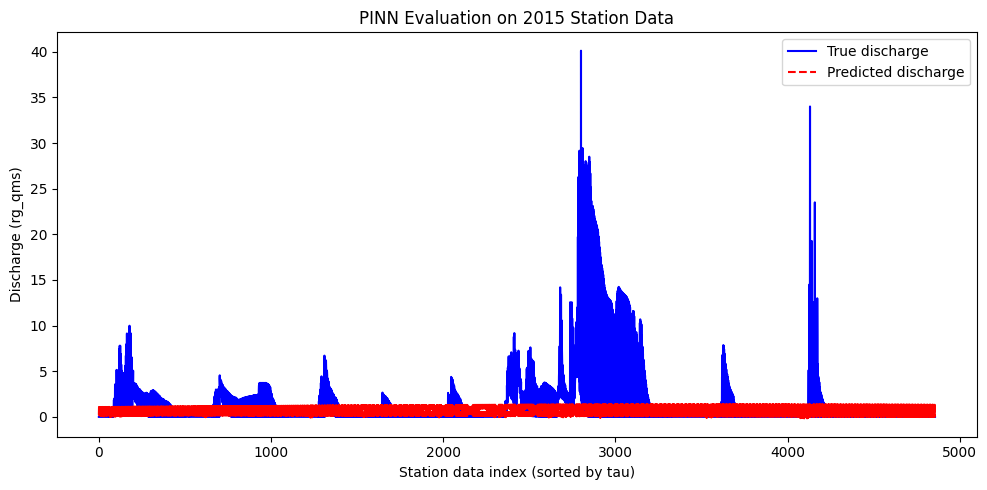

CPU times: user 628 ms, sys: 186 ms, total: 814 ms
Wall time: 639 ms


In [48]:
%%time
import logging
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# For inline plots (if not already set)
%matplotlib inline

###############################################################################
# LOGGING CONFIGURATION
###############################################################################
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s [%(levelname)s] %(message)s",
    datefmt='%H:%M:%S'
)
logger = logging.getLogger(__name__)

###############################################################################
# Model and PDE Definitions
###############################################################################
class SineActivation(nn.Module):
    def forward(self, x):
        return torch.sin(x)

class PINN(nn.Module):
    """
    PINN with Sine activation.
    Input features: [tau_norm, lat_norm, lon_norm, elevation, slope_calculated, rainrate]
    Output: Scaled discharge.
    """
    def __init__(self, in_features=6, hidden_dim=128, out_features=1, num_layers=5):
        super(PINN, self).__init__()
        layers = []
        layers.append(nn.Linear(in_features, hidden_dim))
        layers.append(SineActivation())
        for _ in range(num_layers - 2):
            layers.append(nn.Linear(hidden_dim, hidden_dim))
            layers.append(SineActivation())
        layers.append(nn.Linear(hidden_dim, out_features))
        self.model = nn.Sequential(*layers)
    def forward(self, x):
        return self.model(x)

def pde_with_friction(model, x, base_speed=1.0, slope_factor=0.01, friction_factor=0.01):
    """
    Computes the PDE residual:
      dQ/dtau + wave_speed*(dQ/dlon + dQ/dlat) - friction_factor*Q^2 - rain = 0
    where wave_speed = base_speed + slope_factor*slope.
    Expected x columns: [tau_norm, lat_norm, lon_norm, elevation, slope_calculated, rainrate]
    """
    x.requires_grad_(True)
    tau_norm = x[:, 0:1]
    lat_norm = x[:, 1:2]
    lon_norm = x[:, 2:3]
    slope    = x[:, 4:5]
    rain     = x[:, 5:6]
    Q = model(x)  # (batch,1)

    dQ_dtau = torch.autograd.grad(Q, tau_norm, grad_outputs=torch.ones_like(Q),
                                  create_graph=True, retain_graph=True, allow_unused=True)[0]
    if dQ_dtau is None:
        dQ_dtau = torch.zeros_like(Q)
    dQ_dlat = torch.autograd.grad(Q, lat_norm, grad_outputs=torch.ones_like(Q),
                                  create_graph=True, retain_graph=True, allow_unused=True)[0]
    if dQ_dlat is None:
        dQ_dlat = torch.zeros_like(Q)
    dQ_dlon = torch.autograd.grad(Q, lon_norm, grad_outputs=torch.ones_like(Q),
                                  create_graph=True, retain_graph=True, allow_unused=True)[0]
    if dQ_dlon is None:
        dQ_dlon = torch.zeros_like(Q)

    wave_speed = base_speed + slope_factor * slope
    friction   = friction_factor * (Q**2)
    residual = dQ_dtau + wave_speed*(dQ_dlon + dQ_dlat) - friction - rain
    return residual

###############################################################################
#  Evaluation on 2015 Test Data
###############################################################################
# Define file paths (update exactly as provided)
model_file = "/media/data-ssd/PINN/DATA/model data after proccessing/full POC model/3 final files according to spatial PINN Hebrew/merged/nov2apr/event_base_dfs/remapping time dfs/pinn_model_train4.pt"
test_file  = "/media/data-ssd/PINN/DATA/model data after proccessing/full POC model/3 final files according to spatial PINN Hebrew/merged/nov2apr/event_base_dfs/remapping time dfs/with avg slope(instead nan)/Merged_North_Dead_Sea_2015_avgSlopeFill.csv"

# Load the trained model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
logger.info(f"Loading model from: {model_file}")
model = PINN(in_features=6, hidden_dim=128, out_features=1, num_layers=5).to(device)
model.load_state_dict(torch.load(model_file, map_location=device))
model.eval()
logger.info("Model loaded and set to evaluation mode.")

# Load and preprocess the test file (2015)
logger.info(f"Loading test file from: {test_file}")
df_test = pd.read_csv(test_file)
logger.info(f"Test file shape: {df_test.shape}")

# Fill missing slope using the mean from test file
slope_mean = df_test["slope_calculated"].mean(skipna=True)
df_test["slope_calculated"] = df_test["slope_calculated"].fillna(slope_mean)

# Normalize latitude, longitude, and tau using min values from the test file.
lat_min = df_test["latitude"].min()
lon_min = df_test["longitude"].min()
tau_min = df_test["tau"].min()
df_test["lat_norm"] = df_test["latitude"] - lat_min
df_test["lon_norm"] = df_test["longitude"] - lon_min
df_test["tau_norm"] = df_test["tau"] - tau_min

# Extract station rows (where rg_qms is not NaN) and sort by tau
df_station = df_test[~df_test["rg_qms"].isna()].copy().sort_values("tau")
if df_station.empty:
    logger.error("No station data found in test file!")
else:
    logger.info(f"Found {len(df_station)} station rows in test data.")
    feat_cols = ['tau_norm','lat_norm','lon_norm','elevation','slope_calculated','rainrate']
    X_test = df_station[feat_cols].values
    y_true = df_station["rg_qms"].values  # True discharge
    
    # Convert features to tensor
    X_test_t = torch.tensor(X_test, dtype=torch.float32, requires_grad=False).to(device)
    
    # Evaluate model on test data
    model.eval()
    with torch.no_grad():
        y_pred_scaled = model(X_test_t).squeeze().cpu().numpy()  # Scaled predictions
    
    # Unscale predictions: during training, station discharge was scaled as: 
    # rg_qms_scaled = rg_qms / (max_q+eps)
    # Since we trained on 2012-2015 data, and now testing on 2015,
    # we can recover the max discharge from the test station data.
    max_q_test = df_station["rg_qms"].max()
    eps = 1e-6
    y_pred_unscaled = y_pred_scaled * (max_q_test + eps)
    
    # Plot true vs predicted discharge
    plt.figure(figsize=(10,5))
    plt.plot(y_true, 'b-', label="True discharge")
    plt.plot(y_pred_unscaled, 'r--', label="Predicted discharge")
    plt.title("PINN Evaluation on 2015 Station Data")
    plt.xlabel("Station data index (sorted by tau)")
    plt.ylabel("Discharge (rg_qms)")
    plt.legend()
    plt.tight_layout()
    plt.show()
